# 191009 Homework
##### M946108004 趙上涵 Ricardo S. Chao, Master Student of Data Science, Taipei Medical University. (TMU)

# Homework Introduction
<img src='./PictureSource/0.PNG' width=600px align='center'>

In [1]:
# Configure Monpa Feature
def Monpa_LongCut(long_sentence, split_char):
    seg = []
    for item in long_sentence.split(split_char):
        if item != "\n": seg.extend(monpa.cut(str(item+split_char)))
    return seg[:-1]

In [2]:
# import text document
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 100000000
ChineseDataset = pd.read_csv('./ChineseDataset_Assignment1.txt', sep='^', header=None, dtype='str')
print(ChineseDataset.head(3))
print()
print('How many lines inside the document: ', len(ChineseDataset))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           0
0  林來瘋宰牛台灣運彩地下簽賭強強滾 NBA紐約尼克隊豪小子發威，率尼克隊擊敗去年聯盟總冠軍小牛隊，讓全台球迷駭翻天，今天出戰紐澤西籃網隊，還沒開打，台灣運彩估計從二月五日林書豪在NBA發光發熱以來，台灣運彩的總銷售金額已破億元。至於地下簽賭站的下注金額更是一場比一場多，讓組頭也對林書豪襲捲全球感到不可思議，鋒頭之健已超過王建民在洋基隊時期。(彭清仁報導) NBA紐約尼克隊以七分之差，擊敗去年聯盟總冠軍小牛隊，林書豪拿下廿八分和十四次的助攻，各項亮麗數據，也再次向全球宣誓林來瘋狂潮襲捲。而賽前運彩和地下簽賭站的盤口，都是小牛隊讓分，而台灣運彩有四成五的彩迷認為尼克隊能夠獲勝，另外五成五可能心在尼克，但還是下注小牛隊能獲勝，結果只有四成五的彩迷拿到彩金。至於地下簽賭站的組頭指出，只有四成甚至更低的賭迷，下注林書豪的尼克隊能夠勝出，畢竟小牛隊是去年的總冠軍，隊中名將如雲，卻不料最後

# Overall Version

In [3]:
'''
Chinese stop word dictionary Reference: https://github.com/tomlinNTUB/Python-in-5-days
'''
# Import Packages
import monpa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create Chinese Stop Words Dictionary
stop_words = []
with open('./ChineseStopWord.txt', 'r', encoding='UTF-8') as file:
    for line in file.readlines():
        line = line.strip()
        stop_words.append(line)

# Create Dataframe with Word Counts
word_list_df = pd.DataFrame({'Word':[],
                             'TF_Count':[],
                            'DF_Count':[]})        

# Initialize value of overall_length_of_document
overall_length_of_documents = 0

# Tokenization with Monpa
# for i in range(len(ChineseDataset)):
for i in range(len(ChineseDataset)):
    print('== 第', str(i), '篇斷詞，TF-IDF 計算開始 ==')
    line = str(ChineseDataset.iloc[i,:])
    cut_list = Monpa_LongCut(line, '，')
    # Strip the blanks and \n
    result_list = []
    for index,item in enumerate(cut_list):
        item = item.strip()
        result_list.append(item)
    # Compute length of document, overall length of document
    length_of_document = len(result_list)
    overall_length_of_documents = overall_length_of_documents + length_of_document
    # Remove Stop words
    remain_words = list(filter(lambda a: a not in stop_words and a != '\n', result_list))
    # Append data into wordcount dataframe
    # Calculate DF(phase 1), if word is inside word_list, DF + 1
    unique_remain_words = list(set(remain_words))
    for index,word in enumerate(unique_remain_words):
        condition = (word_list_df['Word'] == word)
        if word in word_list_df.loc[:,'Word'].tolist():
            word_list_df.loc[condition, 'DF_Count'] = word_list_df.loc[condition, 'DF_Count'] + 1
    # Calculate TF, DF (phase 2)
    for index,word in enumerate(remain_words):
        condition = (word_list_df['Word'] == word)
        # If word is not inside word list, TF = 1, DF = 1
        if word not in word_list_df.loc[:,'Word'].tolist():
            word_list_df = word_list_df.append({'Word': word,
                                                'TF_Count': int(1),
                                               'DF_Count': int(1)}, ignore_index=True)
        # If word is inside word_list, TF = TF + 1
        else:
            word_list_df.loc[condition, 'TF_Count'] = word_list_df.loc[condition, 'TF_Count'] + 1
            
# Calculate TF / length of all document
word_list_df.loc[:,'TF/len_all'] = word_list_df.loc[:,'TF_Count'] / overall_length_of_documents
# Calculate IDF
word_list_df.loc[:,'IDF'] =  np.log(len(ChineseDataset) / (word_list_df.loc[:,'DF_Count'] + 1))
# Calculate TF-IDF
# TF-IDF Calculation: https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089
word_list_df.loc[:,'TF-IDF'] =  word_list_df.loc[:,'TF_Count']  * word_list_df.loc[:,'IDF']
# Compte Rank
# pandas.DataFrame.rank: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html
word_list_df['Rank'] = word_list_df['TF_Count'].rank(method='first', ascending=False)
# Add overall length for double check usage
word_list_df['overall_length'] = overall_length_of_documents
# Sort dataframe to graph the plot
word_list_df = word_list_df.sort_values(by='Rank', ascending=True)


print('Overall length of all document is ', overall_length_of_documents)
print('Length of word dict is ', len(word_list_df))

# Graphing Process
plt.plot(word_list_df.loc[:,'Rank'], word_list_df.loc[:,'TF_Count'])
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf Distribution Plot')
plt.show()

word_list_df.to_csv('./ChineseDataset_TF_IDF.csv', header=True, index=False)

10/13/2019 20:25:55 - INFO - monpa -   running on device cpu


+---------------------------------------------------------------------+
  Welcome to MONPA: Multi-Objective NER POS Annotator for Chinese
+---------------------------------------------------------------------+
Good, we can find the model file.
== 第 0 篇斷詞，TF-IDF 計算開始 ==


C:\Users\ricardo\Anaconda3\envs\Monpa\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


== 第 1 篇斷詞，TF-IDF 計算開始 ==
== 第 2 篇斷詞，TF-IDF 計算開始 ==
== 第 3 篇斷詞，TF-IDF 計算開始 ==
== 第 4 篇斷詞，TF-IDF 計算開始 ==
== 第 5 篇斷詞，TF-IDF 計算開始 ==
== 第 6 篇斷詞，TF-IDF 計算開始 ==
== 第 7 篇斷詞，TF-IDF 計算開始 ==
== 第 8 篇斷詞，TF-IDF 計算開始 ==
== 第 9 篇斷詞，TF-IDF 計算開始 ==
== 第 10 篇斷詞，TF-IDF 計算開始 ==
== 第 11 篇斷詞，TF-IDF 計算開始 ==
== 第 12 篇斷詞，TF-IDF 計算開始 ==
== 第 13 篇斷詞，TF-IDF 計算開始 ==
== 第 14 篇斷詞，TF-IDF 計算開始 ==
== 第 15 篇斷詞，TF-IDF 計算開始 ==
== 第 16 篇斷詞，TF-IDF 計算開始 ==
== 第 17 篇斷詞，TF-IDF 計算開始 ==
== 第 18 篇斷詞，TF-IDF 計算開始 ==
== 第 19 篇斷詞，TF-IDF 計算開始 ==
== 第 20 篇斷詞，TF-IDF 計算開始 ==
== 第 21 篇斷詞，TF-IDF 計算開始 ==
== 第 22 篇斷詞，TF-IDF 計算開始 ==
== 第 23 篇斷詞，TF-IDF 計算開始 ==
== 第 24 篇斷詞，TF-IDF 計算開始 ==
== 第 25 篇斷詞，TF-IDF 計算開始 ==
== 第 26 篇斷詞，TF-IDF 計算開始 ==
== 第 27 篇斷詞，TF-IDF 計算開始 ==
== 第 28 篇斷詞，TF-IDF 計算開始 ==
== 第 29 篇斷詞，TF-IDF 計算開始 ==
== 第 30 篇斷詞，TF-IDF 計算開始 ==
== 第 31 篇斷詞，TF-IDF 計算開始 ==
== 第 32 篇斷詞，TF-IDF 計算開始 ==
== 第 33 篇斷詞，TF-IDF 計算開始 ==
== 第 34 篇斷詞，TF-IDF 計算開始 ==
== 第 35 篇斷詞，TF-IDF 計算開始 ==
== 第 36 篇斷詞，TF-IDF 計算開始 ==
== 第 37 篇斷詞，TF-IDF 計算開始 ==
== 第 38 篇斷

== 第 298 篇斷詞，TF-IDF 計算開始 ==
== 第 299 篇斷詞，TF-IDF 計算開始 ==
== 第 300 篇斷詞，TF-IDF 計算開始 ==
== 第 301 篇斷詞，TF-IDF 計算開始 ==
== 第 302 篇斷詞，TF-IDF 計算開始 ==
== 第 303 篇斷詞，TF-IDF 計算開始 ==
== 第 304 篇斷詞，TF-IDF 計算開始 ==
== 第 305 篇斷詞，TF-IDF 計算開始 ==
== 第 306 篇斷詞，TF-IDF 計算開始 ==
== 第 307 篇斷詞，TF-IDF 計算開始 ==
== 第 308 篇斷詞，TF-IDF 計算開始 ==
== 第 309 篇斷詞，TF-IDF 計算開始 ==
== 第 310 篇斷詞，TF-IDF 計算開始 ==
== 第 311 篇斷詞，TF-IDF 計算開始 ==
== 第 312 篇斷詞，TF-IDF 計算開始 ==
== 第 313 篇斷詞，TF-IDF 計算開始 ==
== 第 314 篇斷詞，TF-IDF 計算開始 ==
== 第 315 篇斷詞，TF-IDF 計算開始 ==
== 第 316 篇斷詞，TF-IDF 計算開始 ==
== 第 317 篇斷詞，TF-IDF 計算開始 ==
== 第 318 篇斷詞，TF-IDF 計算開始 ==
== 第 319 篇斷詞，TF-IDF 計算開始 ==
== 第 320 篇斷詞，TF-IDF 計算開始 ==
== 第 321 篇斷詞，TF-IDF 計算開始 ==
== 第 322 篇斷詞，TF-IDF 計算開始 ==
== 第 323 篇斷詞，TF-IDF 計算開始 ==
== 第 324 篇斷詞，TF-IDF 計算開始 ==
== 第 325 篇斷詞，TF-IDF 計算開始 ==
== 第 326 篇斷詞，TF-IDF 計算開始 ==
== 第 327 篇斷詞，TF-IDF 計算開始 ==
== 第 328 篇斷詞，TF-IDF 計算開始 ==
== 第 329 篇斷詞，TF-IDF 計算開始 ==
== 第 330 篇斷詞，TF-IDF 計算開始 ==
== 第 331 篇斷詞，TF-IDF 計算開始 ==
== 第 332 篇斷詞，TF-IDF 計算開始 ==
== 第 333 篇斷詞，TF-IDF 

== 第 591 篇斷詞，TF-IDF 計算開始 ==
== 第 592 篇斷詞，TF-IDF 計算開始 ==
== 第 593 篇斷詞，TF-IDF 計算開始 ==
== 第 594 篇斷詞，TF-IDF 計算開始 ==
== 第 595 篇斷詞，TF-IDF 計算開始 ==
== 第 596 篇斷詞，TF-IDF 計算開始 ==
== 第 597 篇斷詞，TF-IDF 計算開始 ==
== 第 598 篇斷詞，TF-IDF 計算開始 ==
== 第 599 篇斷詞，TF-IDF 計算開始 ==
== 第 600 篇斷詞，TF-IDF 計算開始 ==
== 第 601 篇斷詞，TF-IDF 計算開始 ==
== 第 602 篇斷詞，TF-IDF 計算開始 ==
== 第 603 篇斷詞，TF-IDF 計算開始 ==
== 第 604 篇斷詞，TF-IDF 計算開始 ==
== 第 605 篇斷詞，TF-IDF 計算開始 ==
== 第 606 篇斷詞，TF-IDF 計算開始 ==
== 第 607 篇斷詞，TF-IDF 計算開始 ==
== 第 608 篇斷詞，TF-IDF 計算開始 ==
== 第 609 篇斷詞，TF-IDF 計算開始 ==
== 第 610 篇斷詞，TF-IDF 計算開始 ==
== 第 611 篇斷詞，TF-IDF 計算開始 ==
== 第 612 篇斷詞，TF-IDF 計算開始 ==
== 第 613 篇斷詞，TF-IDF 計算開始 ==
== 第 614 篇斷詞，TF-IDF 計算開始 ==
== 第 615 篇斷詞，TF-IDF 計算開始 ==
== 第 616 篇斷詞，TF-IDF 計算開始 ==
== 第 617 篇斷詞，TF-IDF 計算開始 ==
== 第 618 篇斷詞，TF-IDF 計算開始 ==
== 第 619 篇斷詞，TF-IDF 計算開始 ==
== 第 620 篇斷詞，TF-IDF 計算開始 ==
== 第 621 篇斷詞，TF-IDF 計算開始 ==
== 第 622 篇斷詞，TF-IDF 計算開始 ==
== 第 623 篇斷詞，TF-IDF 計算開始 ==
== 第 624 篇斷詞，TF-IDF 計算開始 ==
== 第 625 篇斷詞，TF-IDF 計算開始 ==
== 第 626 篇斷詞，TF-IDF 

== 第 884 篇斷詞，TF-IDF 計算開始 ==
== 第 885 篇斷詞，TF-IDF 計算開始 ==
== 第 886 篇斷詞，TF-IDF 計算開始 ==
== 第 887 篇斷詞，TF-IDF 計算開始 ==
== 第 888 篇斷詞，TF-IDF 計算開始 ==
== 第 889 篇斷詞，TF-IDF 計算開始 ==
== 第 890 篇斷詞，TF-IDF 計算開始 ==
== 第 891 篇斷詞，TF-IDF 計算開始 ==
== 第 892 篇斷詞，TF-IDF 計算開始 ==
== 第 893 篇斷詞，TF-IDF 計算開始 ==
== 第 894 篇斷詞，TF-IDF 計算開始 ==
== 第 895 篇斷詞，TF-IDF 計算開始 ==
== 第 896 篇斷詞，TF-IDF 計算開始 ==
== 第 897 篇斷詞，TF-IDF 計算開始 ==
== 第 898 篇斷詞，TF-IDF 計算開始 ==
== 第 899 篇斷詞，TF-IDF 計算開始 ==
== 第 900 篇斷詞，TF-IDF 計算開始 ==
== 第 901 篇斷詞，TF-IDF 計算開始 ==
== 第 902 篇斷詞，TF-IDF 計算開始 ==
== 第 903 篇斷詞，TF-IDF 計算開始 ==
== 第 904 篇斷詞，TF-IDF 計算開始 ==
== 第 905 篇斷詞，TF-IDF 計算開始 ==
== 第 906 篇斷詞，TF-IDF 計算開始 ==
== 第 907 篇斷詞，TF-IDF 計算開始 ==
== 第 908 篇斷詞，TF-IDF 計算開始 ==
== 第 909 篇斷詞，TF-IDF 計算開始 ==
== 第 910 篇斷詞，TF-IDF 計算開始 ==
== 第 911 篇斷詞，TF-IDF 計算開始 ==
== 第 912 篇斷詞，TF-IDF 計算開始 ==
== 第 913 篇斷詞，TF-IDF 計算開始 ==
== 第 914 篇斷詞，TF-IDF 計算開始 ==
== 第 915 篇斷詞，TF-IDF 計算開始 ==
== 第 916 篇斷詞，TF-IDF 計算開始 ==
== 第 917 篇斷詞，TF-IDF 計算開始 ==
== 第 918 篇斷詞，TF-IDF 計算開始 ==
== 第 919 篇斷詞，TF-IDF 

== 第 1171 篇斷詞，TF-IDF 計算開始 ==
== 第 1172 篇斷詞，TF-IDF 計算開始 ==
== 第 1173 篇斷詞，TF-IDF 計算開始 ==
== 第 1174 篇斷詞，TF-IDF 計算開始 ==
== 第 1175 篇斷詞，TF-IDF 計算開始 ==
== 第 1176 篇斷詞，TF-IDF 計算開始 ==
== 第 1177 篇斷詞，TF-IDF 計算開始 ==
== 第 1178 篇斷詞，TF-IDF 計算開始 ==
== 第 1179 篇斷詞，TF-IDF 計算開始 ==
== 第 1180 篇斷詞，TF-IDF 計算開始 ==
== 第 1181 篇斷詞，TF-IDF 計算開始 ==
== 第 1182 篇斷詞，TF-IDF 計算開始 ==
== 第 1183 篇斷詞，TF-IDF 計算開始 ==
== 第 1184 篇斷詞，TF-IDF 計算開始 ==
== 第 1185 篇斷詞，TF-IDF 計算開始 ==
== 第 1186 篇斷詞，TF-IDF 計算開始 ==
== 第 1187 篇斷詞，TF-IDF 計算開始 ==
== 第 1188 篇斷詞，TF-IDF 計算開始 ==
== 第 1189 篇斷詞，TF-IDF 計算開始 ==
== 第 1190 篇斷詞，TF-IDF 計算開始 ==
== 第 1191 篇斷詞，TF-IDF 計算開始 ==
== 第 1192 篇斷詞，TF-IDF 計算開始 ==
== 第 1193 篇斷詞，TF-IDF 計算開始 ==
== 第 1194 篇斷詞，TF-IDF 計算開始 ==
== 第 1195 篇斷詞，TF-IDF 計算開始 ==
== 第 1196 篇斷詞，TF-IDF 計算開始 ==
== 第 1197 篇斷詞，TF-IDF 計算開始 ==
== 第 1198 篇斷詞，TF-IDF 計算開始 ==
== 第 1199 篇斷詞，TF-IDF 計算開始 ==
== 第 1200 篇斷詞，TF-IDF 計算開始 ==
== 第 1201 篇斷詞，TF-IDF 計算開始 ==
== 第 1202 篇斷詞，TF-IDF 計算開始 ==
== 第 1203 篇斷詞，TF-IDF 計算開始 ==
== 第 1204 篇斷詞，TF-IDF 計算開始 ==
== 第 1205 篇斷詞，

== 第 1454 篇斷詞，TF-IDF 計算開始 ==
== 第 1455 篇斷詞，TF-IDF 計算開始 ==
== 第 1456 篇斷詞，TF-IDF 計算開始 ==
== 第 1457 篇斷詞，TF-IDF 計算開始 ==
== 第 1458 篇斷詞，TF-IDF 計算開始 ==
== 第 1459 篇斷詞，TF-IDF 計算開始 ==
== 第 1460 篇斷詞，TF-IDF 計算開始 ==
== 第 1461 篇斷詞，TF-IDF 計算開始 ==
== 第 1462 篇斷詞，TF-IDF 計算開始 ==
== 第 1463 篇斷詞，TF-IDF 計算開始 ==
== 第 1464 篇斷詞，TF-IDF 計算開始 ==
== 第 1465 篇斷詞，TF-IDF 計算開始 ==
== 第 1466 篇斷詞，TF-IDF 計算開始 ==
== 第 1467 篇斷詞，TF-IDF 計算開始 ==
== 第 1468 篇斷詞，TF-IDF 計算開始 ==
== 第 1469 篇斷詞，TF-IDF 計算開始 ==
== 第 1470 篇斷詞，TF-IDF 計算開始 ==
== 第 1471 篇斷詞，TF-IDF 計算開始 ==
== 第 1472 篇斷詞，TF-IDF 計算開始 ==
== 第 1473 篇斷詞，TF-IDF 計算開始 ==
== 第 1474 篇斷詞，TF-IDF 計算開始 ==
== 第 1475 篇斷詞，TF-IDF 計算開始 ==
== 第 1476 篇斷詞，TF-IDF 計算開始 ==
== 第 1477 篇斷詞，TF-IDF 計算開始 ==
== 第 1478 篇斷詞，TF-IDF 計算開始 ==
== 第 1479 篇斷詞，TF-IDF 計算開始 ==
== 第 1480 篇斷詞，TF-IDF 計算開始 ==
== 第 1481 篇斷詞，TF-IDF 計算開始 ==
== 第 1482 篇斷詞，TF-IDF 計算開始 ==
== 第 1483 篇斷詞，TF-IDF 計算開始 ==
== 第 1484 篇斷詞，TF-IDF 計算開始 ==
== 第 1485 篇斷詞，TF-IDF 計算開始 ==
== 第 1486 篇斷詞，TF-IDF 計算開始 ==
== 第 1487 篇斷詞，TF-IDF 計算開始 ==
== 第 1488 篇斷詞，

== 第 1737 篇斷詞，TF-IDF 計算開始 ==
== 第 1738 篇斷詞，TF-IDF 計算開始 ==
== 第 1739 篇斷詞，TF-IDF 計算開始 ==
== 第 1740 篇斷詞，TF-IDF 計算開始 ==
== 第 1741 篇斷詞，TF-IDF 計算開始 ==
== 第 1742 篇斷詞，TF-IDF 計算開始 ==
== 第 1743 篇斷詞，TF-IDF 計算開始 ==
== 第 1744 篇斷詞，TF-IDF 計算開始 ==
== 第 1745 篇斷詞，TF-IDF 計算開始 ==
== 第 1746 篇斷詞，TF-IDF 計算開始 ==
== 第 1747 篇斷詞，TF-IDF 計算開始 ==
== 第 1748 篇斷詞，TF-IDF 計算開始 ==
== 第 1749 篇斷詞，TF-IDF 計算開始 ==
== 第 1750 篇斷詞，TF-IDF 計算開始 ==
== 第 1751 篇斷詞，TF-IDF 計算開始 ==
== 第 1752 篇斷詞，TF-IDF 計算開始 ==
== 第 1753 篇斷詞，TF-IDF 計算開始 ==
== 第 1754 篇斷詞，TF-IDF 計算開始 ==
== 第 1755 篇斷詞，TF-IDF 計算開始 ==
== 第 1756 篇斷詞，TF-IDF 計算開始 ==
== 第 1757 篇斷詞，TF-IDF 計算開始 ==
== 第 1758 篇斷詞，TF-IDF 計算開始 ==
== 第 1759 篇斷詞，TF-IDF 計算開始 ==
== 第 1760 篇斷詞，TF-IDF 計算開始 ==
== 第 1761 篇斷詞，TF-IDF 計算開始 ==
== 第 1762 篇斷詞，TF-IDF 計算開始 ==
== 第 1763 篇斷詞，TF-IDF 計算開始 ==
== 第 1764 篇斷詞，TF-IDF 計算開始 ==
== 第 1765 篇斷詞，TF-IDF 計算開始 ==
== 第 1766 篇斷詞，TF-IDF 計算開始 ==
== 第 1767 篇斷詞，TF-IDF 計算開始 ==
== 第 1768 篇斷詞，TF-IDF 計算開始 ==
== 第 1769 篇斷詞，TF-IDF 計算開始 ==
== 第 1770 篇斷詞，TF-IDF 計算開始 ==
== 第 1771 篇斷詞，

== 第 2020 篇斷詞，TF-IDF 計算開始 ==
== 第 2021 篇斷詞，TF-IDF 計算開始 ==
== 第 2022 篇斷詞，TF-IDF 計算開始 ==
== 第 2023 篇斷詞，TF-IDF 計算開始 ==
== 第 2024 篇斷詞，TF-IDF 計算開始 ==
== 第 2025 篇斷詞，TF-IDF 計算開始 ==
== 第 2026 篇斷詞，TF-IDF 計算開始 ==
== 第 2027 篇斷詞，TF-IDF 計算開始 ==
== 第 2028 篇斷詞，TF-IDF 計算開始 ==
== 第 2029 篇斷詞，TF-IDF 計算開始 ==
== 第 2030 篇斷詞，TF-IDF 計算開始 ==
== 第 2031 篇斷詞，TF-IDF 計算開始 ==
== 第 2032 篇斷詞，TF-IDF 計算開始 ==
== 第 2033 篇斷詞，TF-IDF 計算開始 ==
== 第 2034 篇斷詞，TF-IDF 計算開始 ==
== 第 2035 篇斷詞，TF-IDF 計算開始 ==
== 第 2036 篇斷詞，TF-IDF 計算開始 ==
== 第 2037 篇斷詞，TF-IDF 計算開始 ==
== 第 2038 篇斷詞，TF-IDF 計算開始 ==
== 第 2039 篇斷詞，TF-IDF 計算開始 ==
== 第 2040 篇斷詞，TF-IDF 計算開始 ==
== 第 2041 篇斷詞，TF-IDF 計算開始 ==
== 第 2042 篇斷詞，TF-IDF 計算開始 ==
== 第 2043 篇斷詞，TF-IDF 計算開始 ==
== 第 2044 篇斷詞，TF-IDF 計算開始 ==
== 第 2045 篇斷詞，TF-IDF 計算開始 ==
== 第 2046 篇斷詞，TF-IDF 計算開始 ==
== 第 2047 篇斷詞，TF-IDF 計算開始 ==
== 第 2048 篇斷詞，TF-IDF 計算開始 ==
== 第 2049 篇斷詞，TF-IDF 計算開始 ==
== 第 2050 篇斷詞，TF-IDF 計算開始 ==
== 第 2051 篇斷詞，TF-IDF 計算開始 ==
== 第 2052 篇斷詞，TF-IDF 計算開始 ==
== 第 2053 篇斷詞，TF-IDF 計算開始 ==
== 第 2054 篇斷詞，

== 第 2303 篇斷詞，TF-IDF 計算開始 ==
== 第 2304 篇斷詞，TF-IDF 計算開始 ==
== 第 2305 篇斷詞，TF-IDF 計算開始 ==
== 第 2306 篇斷詞，TF-IDF 計算開始 ==
== 第 2307 篇斷詞，TF-IDF 計算開始 ==
== 第 2308 篇斷詞，TF-IDF 計算開始 ==
== 第 2309 篇斷詞，TF-IDF 計算開始 ==
== 第 2310 篇斷詞，TF-IDF 計算開始 ==
== 第 2311 篇斷詞，TF-IDF 計算開始 ==
== 第 2312 篇斷詞，TF-IDF 計算開始 ==
== 第 2313 篇斷詞，TF-IDF 計算開始 ==
== 第 2314 篇斷詞，TF-IDF 計算開始 ==
== 第 2315 篇斷詞，TF-IDF 計算開始 ==
== 第 2316 篇斷詞，TF-IDF 計算開始 ==
== 第 2317 篇斷詞，TF-IDF 計算開始 ==
== 第 2318 篇斷詞，TF-IDF 計算開始 ==
== 第 2319 篇斷詞，TF-IDF 計算開始 ==
== 第 2320 篇斷詞，TF-IDF 計算開始 ==
== 第 2321 篇斷詞，TF-IDF 計算開始 ==
== 第 2322 篇斷詞，TF-IDF 計算開始 ==
== 第 2323 篇斷詞，TF-IDF 計算開始 ==
== 第 2324 篇斷詞，TF-IDF 計算開始 ==
== 第 2325 篇斷詞，TF-IDF 計算開始 ==
== 第 2326 篇斷詞，TF-IDF 計算開始 ==
== 第 2327 篇斷詞，TF-IDF 計算開始 ==
== 第 2328 篇斷詞，TF-IDF 計算開始 ==
== 第 2329 篇斷詞，TF-IDF 計算開始 ==
== 第 2330 篇斷詞，TF-IDF 計算開始 ==
== 第 2331 篇斷詞，TF-IDF 計算開始 ==
== 第 2332 篇斷詞，TF-IDF 計算開始 ==
== 第 2333 篇斷詞，TF-IDF 計算開始 ==
== 第 2334 篇斷詞，TF-IDF 計算開始 ==
== 第 2335 篇斷詞，TF-IDF 計算開始 ==
== 第 2336 篇斷詞，TF-IDF 計算開始 ==
== 第 2337 篇斷詞，

== 第 2586 篇斷詞，TF-IDF 計算開始 ==
== 第 2587 篇斷詞，TF-IDF 計算開始 ==
== 第 2588 篇斷詞，TF-IDF 計算開始 ==
== 第 2589 篇斷詞，TF-IDF 計算開始 ==
== 第 2590 篇斷詞，TF-IDF 計算開始 ==
== 第 2591 篇斷詞，TF-IDF 計算開始 ==
== 第 2592 篇斷詞，TF-IDF 計算開始 ==
== 第 2593 篇斷詞，TF-IDF 計算開始 ==
== 第 2594 篇斷詞，TF-IDF 計算開始 ==
== 第 2595 篇斷詞，TF-IDF 計算開始 ==
== 第 2596 篇斷詞，TF-IDF 計算開始 ==
== 第 2597 篇斷詞，TF-IDF 計算開始 ==
== 第 2598 篇斷詞，TF-IDF 計算開始 ==
== 第 2599 篇斷詞，TF-IDF 計算開始 ==
== 第 2600 篇斷詞，TF-IDF 計算開始 ==
== 第 2601 篇斷詞，TF-IDF 計算開始 ==
== 第 2602 篇斷詞，TF-IDF 計算開始 ==
== 第 2603 篇斷詞，TF-IDF 計算開始 ==
== 第 2604 篇斷詞，TF-IDF 計算開始 ==
== 第 2605 篇斷詞，TF-IDF 計算開始 ==
== 第 2606 篇斷詞，TF-IDF 計算開始 ==
== 第 2607 篇斷詞，TF-IDF 計算開始 ==
== 第 2608 篇斷詞，TF-IDF 計算開始 ==
== 第 2609 篇斷詞，TF-IDF 計算開始 ==
== 第 2610 篇斷詞，TF-IDF 計算開始 ==
== 第 2611 篇斷詞，TF-IDF 計算開始 ==
== 第 2612 篇斷詞，TF-IDF 計算開始 ==
== 第 2613 篇斷詞，TF-IDF 計算開始 ==
== 第 2614 篇斷詞，TF-IDF 計算開始 ==
== 第 2615 篇斷詞，TF-IDF 計算開始 ==
== 第 2616 篇斷詞，TF-IDF 計算開始 ==
== 第 2617 篇斷詞，TF-IDF 計算開始 ==
== 第 2618 篇斷詞，TF-IDF 計算開始 ==
== 第 2619 篇斷詞，TF-IDF 計算開始 ==
== 第 2620 篇斷詞，

== 第 2869 篇斷詞，TF-IDF 計算開始 ==
== 第 2870 篇斷詞，TF-IDF 計算開始 ==
== 第 2871 篇斷詞，TF-IDF 計算開始 ==
== 第 2872 篇斷詞，TF-IDF 計算開始 ==
== 第 2873 篇斷詞，TF-IDF 計算開始 ==
== 第 2874 篇斷詞，TF-IDF 計算開始 ==
== 第 2875 篇斷詞，TF-IDF 計算開始 ==
== 第 2876 篇斷詞，TF-IDF 計算開始 ==
== 第 2877 篇斷詞，TF-IDF 計算開始 ==
== 第 2878 篇斷詞，TF-IDF 計算開始 ==
== 第 2879 篇斷詞，TF-IDF 計算開始 ==
== 第 2880 篇斷詞，TF-IDF 計算開始 ==
== 第 2881 篇斷詞，TF-IDF 計算開始 ==
== 第 2882 篇斷詞，TF-IDF 計算開始 ==
== 第 2883 篇斷詞，TF-IDF 計算開始 ==
== 第 2884 篇斷詞，TF-IDF 計算開始 ==
== 第 2885 篇斷詞，TF-IDF 計算開始 ==
== 第 2886 篇斷詞，TF-IDF 計算開始 ==
== 第 2887 篇斷詞，TF-IDF 計算開始 ==
== 第 2888 篇斷詞，TF-IDF 計算開始 ==
== 第 2889 篇斷詞，TF-IDF 計算開始 ==
== 第 2890 篇斷詞，TF-IDF 計算開始 ==
== 第 2891 篇斷詞，TF-IDF 計算開始 ==
== 第 2892 篇斷詞，TF-IDF 計算開始 ==
== 第 2893 篇斷詞，TF-IDF 計算開始 ==
== 第 2894 篇斷詞，TF-IDF 計算開始 ==
== 第 2895 篇斷詞，TF-IDF 計算開始 ==
== 第 2896 篇斷詞，TF-IDF 計算開始 ==
== 第 2897 篇斷詞，TF-IDF 計算開始 ==
== 第 2898 篇斷詞，TF-IDF 計算開始 ==
== 第 2899 篇斷詞，TF-IDF 計算開始 ==
== 第 2900 篇斷詞，TF-IDF 計算開始 ==
== 第 2901 篇斷詞，TF-IDF 計算開始 ==
== 第 2902 篇斷詞，TF-IDF 計算開始 ==
== 第 2903 篇斷詞，

== 第 3152 篇斷詞，TF-IDF 計算開始 ==
== 第 3153 篇斷詞，TF-IDF 計算開始 ==
== 第 3154 篇斷詞，TF-IDF 計算開始 ==
== 第 3155 篇斷詞，TF-IDF 計算開始 ==
== 第 3156 篇斷詞，TF-IDF 計算開始 ==
== 第 3157 篇斷詞，TF-IDF 計算開始 ==
== 第 3158 篇斷詞，TF-IDF 計算開始 ==
== 第 3159 篇斷詞，TF-IDF 計算開始 ==
== 第 3160 篇斷詞，TF-IDF 計算開始 ==
== 第 3161 篇斷詞，TF-IDF 計算開始 ==
== 第 3162 篇斷詞，TF-IDF 計算開始 ==
== 第 3163 篇斷詞，TF-IDF 計算開始 ==
== 第 3164 篇斷詞，TF-IDF 計算開始 ==
== 第 3165 篇斷詞，TF-IDF 計算開始 ==
== 第 3166 篇斷詞，TF-IDF 計算開始 ==
== 第 3167 篇斷詞，TF-IDF 計算開始 ==
== 第 3168 篇斷詞，TF-IDF 計算開始 ==
== 第 3169 篇斷詞，TF-IDF 計算開始 ==
== 第 3170 篇斷詞，TF-IDF 計算開始 ==
== 第 3171 篇斷詞，TF-IDF 計算開始 ==
== 第 3172 篇斷詞，TF-IDF 計算開始 ==
== 第 3173 篇斷詞，TF-IDF 計算開始 ==
== 第 3174 篇斷詞，TF-IDF 計算開始 ==
== 第 3175 篇斷詞，TF-IDF 計算開始 ==
== 第 3176 篇斷詞，TF-IDF 計算開始 ==
== 第 3177 篇斷詞，TF-IDF 計算開始 ==
== 第 3178 篇斷詞，TF-IDF 計算開始 ==
== 第 3179 篇斷詞，TF-IDF 計算開始 ==
== 第 3180 篇斷詞，TF-IDF 計算開始 ==
== 第 3181 篇斷詞，TF-IDF 計算開始 ==
== 第 3182 篇斷詞，TF-IDF 計算開始 ==
== 第 3183 篇斷詞，TF-IDF 計算開始 ==
== 第 3184 篇斷詞，TF-IDF 計算開始 ==
== 第 3185 篇斷詞，TF-IDF 計算開始 ==
== 第 3186 篇斷詞，

== 第 3435 篇斷詞，TF-IDF 計算開始 ==
== 第 3436 篇斷詞，TF-IDF 計算開始 ==
== 第 3437 篇斷詞，TF-IDF 計算開始 ==
== 第 3438 篇斷詞，TF-IDF 計算開始 ==
== 第 3439 篇斷詞，TF-IDF 計算開始 ==
== 第 3440 篇斷詞，TF-IDF 計算開始 ==
== 第 3441 篇斷詞，TF-IDF 計算開始 ==
== 第 3442 篇斷詞，TF-IDF 計算開始 ==
== 第 3443 篇斷詞，TF-IDF 計算開始 ==
== 第 3444 篇斷詞，TF-IDF 計算開始 ==
== 第 3445 篇斷詞，TF-IDF 計算開始 ==
== 第 3446 篇斷詞，TF-IDF 計算開始 ==
== 第 3447 篇斷詞，TF-IDF 計算開始 ==
== 第 3448 篇斷詞，TF-IDF 計算開始 ==
== 第 3449 篇斷詞，TF-IDF 計算開始 ==
== 第 3450 篇斷詞，TF-IDF 計算開始 ==
== 第 3451 篇斷詞，TF-IDF 計算開始 ==
== 第 3452 篇斷詞，TF-IDF 計算開始 ==
== 第 3453 篇斷詞，TF-IDF 計算開始 ==
== 第 3454 篇斷詞，TF-IDF 計算開始 ==
== 第 3455 篇斷詞，TF-IDF 計算開始 ==
== 第 3456 篇斷詞，TF-IDF 計算開始 ==
== 第 3457 篇斷詞，TF-IDF 計算開始 ==
== 第 3458 篇斷詞，TF-IDF 計算開始 ==
== 第 3459 篇斷詞，TF-IDF 計算開始 ==
== 第 3460 篇斷詞，TF-IDF 計算開始 ==
== 第 3461 篇斷詞，TF-IDF 計算開始 ==
== 第 3462 篇斷詞，TF-IDF 計算開始 ==
== 第 3463 篇斷詞，TF-IDF 計算開始 ==
== 第 3464 篇斷詞，TF-IDF 計算開始 ==
== 第 3465 篇斷詞，TF-IDF 計算開始 ==
== 第 3466 篇斷詞，TF-IDF 計算開始 ==
== 第 3467 篇斷詞，TF-IDF 計算開始 ==
== 第 3468 篇斷詞，TF-IDF 計算開始 ==
== 第 3469 篇斷詞，

== 第 3718 篇斷詞，TF-IDF 計算開始 ==
== 第 3719 篇斷詞，TF-IDF 計算開始 ==
== 第 3720 篇斷詞，TF-IDF 計算開始 ==
== 第 3721 篇斷詞，TF-IDF 計算開始 ==
== 第 3722 篇斷詞，TF-IDF 計算開始 ==
== 第 3723 篇斷詞，TF-IDF 計算開始 ==
== 第 3724 篇斷詞，TF-IDF 計算開始 ==
== 第 3725 篇斷詞，TF-IDF 計算開始 ==
== 第 3726 篇斷詞，TF-IDF 計算開始 ==
== 第 3727 篇斷詞，TF-IDF 計算開始 ==
== 第 3728 篇斷詞，TF-IDF 計算開始 ==
== 第 3729 篇斷詞，TF-IDF 計算開始 ==
== 第 3730 篇斷詞，TF-IDF 計算開始 ==
== 第 3731 篇斷詞，TF-IDF 計算開始 ==
== 第 3732 篇斷詞，TF-IDF 計算開始 ==
== 第 3733 篇斷詞，TF-IDF 計算開始 ==
== 第 3734 篇斷詞，TF-IDF 計算開始 ==
== 第 3735 篇斷詞，TF-IDF 計算開始 ==
== 第 3736 篇斷詞，TF-IDF 計算開始 ==
== 第 3737 篇斷詞，TF-IDF 計算開始 ==
== 第 3738 篇斷詞，TF-IDF 計算開始 ==
== 第 3739 篇斷詞，TF-IDF 計算開始 ==
== 第 3740 篇斷詞，TF-IDF 計算開始 ==
== 第 3741 篇斷詞，TF-IDF 計算開始 ==
== 第 3742 篇斷詞，TF-IDF 計算開始 ==
== 第 3743 篇斷詞，TF-IDF 計算開始 ==
== 第 3744 篇斷詞，TF-IDF 計算開始 ==
== 第 3745 篇斷詞，TF-IDF 計算開始 ==
== 第 3746 篇斷詞，TF-IDF 計算開始 ==
== 第 3747 篇斷詞，TF-IDF 計算開始 ==
== 第 3748 篇斷詞，TF-IDF 計算開始 ==
== 第 3749 篇斷詞，TF-IDF 計算開始 ==
== 第 3750 篇斷詞，TF-IDF 計算開始 ==
== 第 3751 篇斷詞，TF-IDF 計算開始 ==
== 第 3752 篇斷詞，

== 第 4001 篇斷詞，TF-IDF 計算開始 ==
== 第 4002 篇斷詞，TF-IDF 計算開始 ==
== 第 4003 篇斷詞，TF-IDF 計算開始 ==
== 第 4004 篇斷詞，TF-IDF 計算開始 ==
== 第 4005 篇斷詞，TF-IDF 計算開始 ==
== 第 4006 篇斷詞，TF-IDF 計算開始 ==
== 第 4007 篇斷詞，TF-IDF 計算開始 ==
== 第 4008 篇斷詞，TF-IDF 計算開始 ==
== 第 4009 篇斷詞，TF-IDF 計算開始 ==
== 第 4010 篇斷詞，TF-IDF 計算開始 ==
== 第 4011 篇斷詞，TF-IDF 計算開始 ==
== 第 4012 篇斷詞，TF-IDF 計算開始 ==
== 第 4013 篇斷詞，TF-IDF 計算開始 ==
== 第 4014 篇斷詞，TF-IDF 計算開始 ==
== 第 4015 篇斷詞，TF-IDF 計算開始 ==
== 第 4016 篇斷詞，TF-IDF 計算開始 ==
== 第 4017 篇斷詞，TF-IDF 計算開始 ==
== 第 4018 篇斷詞，TF-IDF 計算開始 ==
== 第 4019 篇斷詞，TF-IDF 計算開始 ==
== 第 4020 篇斷詞，TF-IDF 計算開始 ==
== 第 4021 篇斷詞，TF-IDF 計算開始 ==
== 第 4022 篇斷詞，TF-IDF 計算開始 ==
== 第 4023 篇斷詞，TF-IDF 計算開始 ==
== 第 4024 篇斷詞，TF-IDF 計算開始 ==
== 第 4025 篇斷詞，TF-IDF 計算開始 ==
== 第 4026 篇斷詞，TF-IDF 計算開始 ==
== 第 4027 篇斷詞，TF-IDF 計算開始 ==
== 第 4028 篇斷詞，TF-IDF 計算開始 ==
== 第 4029 篇斷詞，TF-IDF 計算開始 ==
== 第 4030 篇斷詞，TF-IDF 計算開始 ==
== 第 4031 篇斷詞，TF-IDF 計算開始 ==
== 第 4032 篇斷詞，TF-IDF 計算開始 ==
== 第 4033 篇斷詞，TF-IDF 計算開始 ==
== 第 4034 篇斷詞，TF-IDF 計算開始 ==
== 第 4035 篇斷詞，

== 第 4284 篇斷詞，TF-IDF 計算開始 ==
== 第 4285 篇斷詞，TF-IDF 計算開始 ==
== 第 4286 篇斷詞，TF-IDF 計算開始 ==
== 第 4287 篇斷詞，TF-IDF 計算開始 ==
== 第 4288 篇斷詞，TF-IDF 計算開始 ==
== 第 4289 篇斷詞，TF-IDF 計算開始 ==
== 第 4290 篇斷詞，TF-IDF 計算開始 ==
== 第 4291 篇斷詞，TF-IDF 計算開始 ==
== 第 4292 篇斷詞，TF-IDF 計算開始 ==
== 第 4293 篇斷詞，TF-IDF 計算開始 ==
== 第 4294 篇斷詞，TF-IDF 計算開始 ==
== 第 4295 篇斷詞，TF-IDF 計算開始 ==
== 第 4296 篇斷詞，TF-IDF 計算開始 ==
== 第 4297 篇斷詞，TF-IDF 計算開始 ==
== 第 4298 篇斷詞，TF-IDF 計算開始 ==
== 第 4299 篇斷詞，TF-IDF 計算開始 ==
== 第 4300 篇斷詞，TF-IDF 計算開始 ==
== 第 4301 篇斷詞，TF-IDF 計算開始 ==
== 第 4302 篇斷詞，TF-IDF 計算開始 ==
== 第 4303 篇斷詞，TF-IDF 計算開始 ==
== 第 4304 篇斷詞，TF-IDF 計算開始 ==
== 第 4305 篇斷詞，TF-IDF 計算開始 ==
== 第 4306 篇斷詞，TF-IDF 計算開始 ==
== 第 4307 篇斷詞，TF-IDF 計算開始 ==
== 第 4308 篇斷詞，TF-IDF 計算開始 ==
== 第 4309 篇斷詞，TF-IDF 計算開始 ==
== 第 4310 篇斷詞，TF-IDF 計算開始 ==
== 第 4311 篇斷詞，TF-IDF 計算開始 ==
== 第 4312 篇斷詞，TF-IDF 計算開始 ==
== 第 4313 篇斷詞，TF-IDF 計算開始 ==
== 第 4314 篇斷詞，TF-IDF 計算開始 ==
== 第 4315 篇斷詞，TF-IDF 計算開始 ==
== 第 4316 篇斷詞，TF-IDF 計算開始 ==
== 第 4317 篇斷詞，TF-IDF 計算開始 ==
== 第 4318 篇斷詞，

== 第 4567 篇斷詞，TF-IDF 計算開始 ==
== 第 4568 篇斷詞，TF-IDF 計算開始 ==
== 第 4569 篇斷詞，TF-IDF 計算開始 ==
== 第 4570 篇斷詞，TF-IDF 計算開始 ==
== 第 4571 篇斷詞，TF-IDF 計算開始 ==
== 第 4572 篇斷詞，TF-IDF 計算開始 ==
== 第 4573 篇斷詞，TF-IDF 計算開始 ==
== 第 4574 篇斷詞，TF-IDF 計算開始 ==
== 第 4575 篇斷詞，TF-IDF 計算開始 ==
== 第 4576 篇斷詞，TF-IDF 計算開始 ==
== 第 4577 篇斷詞，TF-IDF 計算開始 ==
== 第 4578 篇斷詞，TF-IDF 計算開始 ==
== 第 4579 篇斷詞，TF-IDF 計算開始 ==
== 第 4580 篇斷詞，TF-IDF 計算開始 ==
== 第 4581 篇斷詞，TF-IDF 計算開始 ==
== 第 4582 篇斷詞，TF-IDF 計算開始 ==
== 第 4583 篇斷詞，TF-IDF 計算開始 ==
== 第 4584 篇斷詞，TF-IDF 計算開始 ==
== 第 4585 篇斷詞，TF-IDF 計算開始 ==
== 第 4586 篇斷詞，TF-IDF 計算開始 ==
== 第 4587 篇斷詞，TF-IDF 計算開始 ==
== 第 4588 篇斷詞，TF-IDF 計算開始 ==
== 第 4589 篇斷詞，TF-IDF 計算開始 ==
== 第 4590 篇斷詞，TF-IDF 計算開始 ==
== 第 4591 篇斷詞，TF-IDF 計算開始 ==
== 第 4592 篇斷詞，TF-IDF 計算開始 ==
== 第 4593 篇斷詞，TF-IDF 計算開始 ==
== 第 4594 篇斷詞，TF-IDF 計算開始 ==
== 第 4595 篇斷詞，TF-IDF 計算開始 ==
== 第 4596 篇斷詞，TF-IDF 計算開始 ==
== 第 4597 篇斷詞，TF-IDF 計算開始 ==
== 第 4598 篇斷詞，TF-IDF 計算開始 ==
== 第 4599 篇斷詞，TF-IDF 計算開始 ==
== 第 4600 篇斷詞，TF-IDF 計算開始 ==
== 第 4601 篇斷詞，

== 第 4850 篇斷詞，TF-IDF 計算開始 ==
== 第 4851 篇斷詞，TF-IDF 計算開始 ==
== 第 4852 篇斷詞，TF-IDF 計算開始 ==
== 第 4853 篇斷詞，TF-IDF 計算開始 ==
== 第 4854 篇斷詞，TF-IDF 計算開始 ==
== 第 4855 篇斷詞，TF-IDF 計算開始 ==
== 第 4856 篇斷詞，TF-IDF 計算開始 ==
== 第 4857 篇斷詞，TF-IDF 計算開始 ==
== 第 4858 篇斷詞，TF-IDF 計算開始 ==
== 第 4859 篇斷詞，TF-IDF 計算開始 ==
== 第 4860 篇斷詞，TF-IDF 計算開始 ==
== 第 4861 篇斷詞，TF-IDF 計算開始 ==
== 第 4862 篇斷詞，TF-IDF 計算開始 ==
== 第 4863 篇斷詞，TF-IDF 計算開始 ==
== 第 4864 篇斷詞，TF-IDF 計算開始 ==
== 第 4865 篇斷詞，TF-IDF 計算開始 ==
== 第 4866 篇斷詞，TF-IDF 計算開始 ==
== 第 4867 篇斷詞，TF-IDF 計算開始 ==
== 第 4868 篇斷詞，TF-IDF 計算開始 ==
== 第 4869 篇斷詞，TF-IDF 計算開始 ==
== 第 4870 篇斷詞，TF-IDF 計算開始 ==
== 第 4871 篇斷詞，TF-IDF 計算開始 ==
== 第 4872 篇斷詞，TF-IDF 計算開始 ==
== 第 4873 篇斷詞，TF-IDF 計算開始 ==
== 第 4874 篇斷詞，TF-IDF 計算開始 ==
== 第 4875 篇斷詞，TF-IDF 計算開始 ==
== 第 4876 篇斷詞，TF-IDF 計算開始 ==
== 第 4877 篇斷詞，TF-IDF 計算開始 ==
== 第 4878 篇斷詞，TF-IDF 計算開始 ==
== 第 4879 篇斷詞，TF-IDF 計算開始 ==
== 第 4880 篇斷詞，TF-IDF 計算開始 ==
== 第 4881 篇斷詞，TF-IDF 計算開始 ==
== 第 4882 篇斷詞，TF-IDF 計算開始 ==
== 第 4883 篇斷詞，TF-IDF 計算開始 ==
== 第 4884 篇斷詞，

== 第 5133 篇斷詞，TF-IDF 計算開始 ==
== 第 5134 篇斷詞，TF-IDF 計算開始 ==
== 第 5135 篇斷詞，TF-IDF 計算開始 ==
== 第 5136 篇斷詞，TF-IDF 計算開始 ==
== 第 5137 篇斷詞，TF-IDF 計算開始 ==
== 第 5138 篇斷詞，TF-IDF 計算開始 ==
== 第 5139 篇斷詞，TF-IDF 計算開始 ==
== 第 5140 篇斷詞，TF-IDF 計算開始 ==
== 第 5141 篇斷詞，TF-IDF 計算開始 ==
== 第 5142 篇斷詞，TF-IDF 計算開始 ==
== 第 5143 篇斷詞，TF-IDF 計算開始 ==
== 第 5144 篇斷詞，TF-IDF 計算開始 ==
== 第 5145 篇斷詞，TF-IDF 計算開始 ==
== 第 5146 篇斷詞，TF-IDF 計算開始 ==
== 第 5147 篇斷詞，TF-IDF 計算開始 ==
== 第 5148 篇斷詞，TF-IDF 計算開始 ==
== 第 5149 篇斷詞，TF-IDF 計算開始 ==
== 第 5150 篇斷詞，TF-IDF 計算開始 ==
== 第 5151 篇斷詞，TF-IDF 計算開始 ==
== 第 5152 篇斷詞，TF-IDF 計算開始 ==
== 第 5153 篇斷詞，TF-IDF 計算開始 ==
== 第 5154 篇斷詞，TF-IDF 計算開始 ==
== 第 5155 篇斷詞，TF-IDF 計算開始 ==
== 第 5156 篇斷詞，TF-IDF 計算開始 ==
== 第 5157 篇斷詞，TF-IDF 計算開始 ==
== 第 5158 篇斷詞，TF-IDF 計算開始 ==
== 第 5159 篇斷詞，TF-IDF 計算開始 ==
== 第 5160 篇斷詞，TF-IDF 計算開始 ==
== 第 5161 篇斷詞，TF-IDF 計算開始 ==
== 第 5162 篇斷詞，TF-IDF 計算開始 ==
== 第 5163 篇斷詞，TF-IDF 計算開始 ==
== 第 5164 篇斷詞，TF-IDF 計算開始 ==
== 第 5165 篇斷詞，TF-IDF 計算開始 ==
== 第 5166 篇斷詞，TF-IDF 計算開始 ==
== 第 5167 篇斷詞，

== 第 5416 篇斷詞，TF-IDF 計算開始 ==
== 第 5417 篇斷詞，TF-IDF 計算開始 ==
== 第 5418 篇斷詞，TF-IDF 計算開始 ==
== 第 5419 篇斷詞，TF-IDF 計算開始 ==
== 第 5420 篇斷詞，TF-IDF 計算開始 ==
== 第 5421 篇斷詞，TF-IDF 計算開始 ==
== 第 5422 篇斷詞，TF-IDF 計算開始 ==
== 第 5423 篇斷詞，TF-IDF 計算開始 ==
== 第 5424 篇斷詞，TF-IDF 計算開始 ==
== 第 5425 篇斷詞，TF-IDF 計算開始 ==
== 第 5426 篇斷詞，TF-IDF 計算開始 ==
== 第 5427 篇斷詞，TF-IDF 計算開始 ==
== 第 5428 篇斷詞，TF-IDF 計算開始 ==
== 第 5429 篇斷詞，TF-IDF 計算開始 ==
== 第 5430 篇斷詞，TF-IDF 計算開始 ==
== 第 5431 篇斷詞，TF-IDF 計算開始 ==
== 第 5432 篇斷詞，TF-IDF 計算開始 ==
== 第 5433 篇斷詞，TF-IDF 計算開始 ==
== 第 5434 篇斷詞，TF-IDF 計算開始 ==
== 第 5435 篇斷詞，TF-IDF 計算開始 ==
== 第 5436 篇斷詞，TF-IDF 計算開始 ==
== 第 5437 篇斷詞，TF-IDF 計算開始 ==
== 第 5438 篇斷詞，TF-IDF 計算開始 ==
== 第 5439 篇斷詞，TF-IDF 計算開始 ==
== 第 5440 篇斷詞，TF-IDF 計算開始 ==
== 第 5441 篇斷詞，TF-IDF 計算開始 ==
== 第 5442 篇斷詞，TF-IDF 計算開始 ==
== 第 5443 篇斷詞，TF-IDF 計算開始 ==
== 第 5444 篇斷詞，TF-IDF 計算開始 ==
== 第 5445 篇斷詞，TF-IDF 計算開始 ==
== 第 5446 篇斷詞，TF-IDF 計算開始 ==
== 第 5447 篇斷詞，TF-IDF 計算開始 ==
== 第 5448 篇斷詞，TF-IDF 計算開始 ==
== 第 5449 篇斷詞，TF-IDF 計算開始 ==
== 第 5450 篇斷詞，

== 第 5699 篇斷詞，TF-IDF 計算開始 ==
== 第 5700 篇斷詞，TF-IDF 計算開始 ==
== 第 5701 篇斷詞，TF-IDF 計算開始 ==
== 第 5702 篇斷詞，TF-IDF 計算開始 ==
== 第 5703 篇斷詞，TF-IDF 計算開始 ==
== 第 5704 篇斷詞，TF-IDF 計算開始 ==
== 第 5705 篇斷詞，TF-IDF 計算開始 ==
== 第 5706 篇斷詞，TF-IDF 計算開始 ==
== 第 5707 篇斷詞，TF-IDF 計算開始 ==
== 第 5708 篇斷詞，TF-IDF 計算開始 ==
== 第 5709 篇斷詞，TF-IDF 計算開始 ==
== 第 5710 篇斷詞，TF-IDF 計算開始 ==
== 第 5711 篇斷詞，TF-IDF 計算開始 ==
== 第 5712 篇斷詞，TF-IDF 計算開始 ==
== 第 5713 篇斷詞，TF-IDF 計算開始 ==
== 第 5714 篇斷詞，TF-IDF 計算開始 ==
== 第 5715 篇斷詞，TF-IDF 計算開始 ==
== 第 5716 篇斷詞，TF-IDF 計算開始 ==
== 第 5717 篇斷詞，TF-IDF 計算開始 ==
== 第 5718 篇斷詞，TF-IDF 計算開始 ==
== 第 5719 篇斷詞，TF-IDF 計算開始 ==
== 第 5720 篇斷詞，TF-IDF 計算開始 ==
== 第 5721 篇斷詞，TF-IDF 計算開始 ==
== 第 5722 篇斷詞，TF-IDF 計算開始 ==
== 第 5723 篇斷詞，TF-IDF 計算開始 ==
== 第 5724 篇斷詞，TF-IDF 計算開始 ==
== 第 5725 篇斷詞，TF-IDF 計算開始 ==
== 第 5726 篇斷詞，TF-IDF 計算開始 ==
== 第 5727 篇斷詞，TF-IDF 計算開始 ==
== 第 5728 篇斷詞，TF-IDF 計算開始 ==
== 第 5729 篇斷詞，TF-IDF 計算開始 ==
== 第 5730 篇斷詞，TF-IDF 計算開始 ==
== 第 5731 篇斷詞，TF-IDF 計算開始 ==
== 第 5732 篇斷詞，TF-IDF 計算開始 ==
== 第 5733 篇斷詞，

== 第 5982 篇斷詞，TF-IDF 計算開始 ==
== 第 5983 篇斷詞，TF-IDF 計算開始 ==
== 第 5984 篇斷詞，TF-IDF 計算開始 ==
== 第 5985 篇斷詞，TF-IDF 計算開始 ==
== 第 5986 篇斷詞，TF-IDF 計算開始 ==
== 第 5987 篇斷詞，TF-IDF 計算開始 ==
== 第 5988 篇斷詞，TF-IDF 計算開始 ==
== 第 5989 篇斷詞，TF-IDF 計算開始 ==
== 第 5990 篇斷詞，TF-IDF 計算開始 ==
== 第 5991 篇斷詞，TF-IDF 計算開始 ==
== 第 5992 篇斷詞，TF-IDF 計算開始 ==
== 第 5993 篇斷詞，TF-IDF 計算開始 ==
== 第 5994 篇斷詞，TF-IDF 計算開始 ==
== 第 5995 篇斷詞，TF-IDF 計算開始 ==
== 第 5996 篇斷詞，TF-IDF 計算開始 ==
== 第 5997 篇斷詞，TF-IDF 計算開始 ==
== 第 5998 篇斷詞，TF-IDF 計算開始 ==
== 第 5999 篇斷詞，TF-IDF 計算開始 ==
== 第 6000 篇斷詞，TF-IDF 計算開始 ==
== 第 6001 篇斷詞，TF-IDF 計算開始 ==
== 第 6002 篇斷詞，TF-IDF 計算開始 ==
== 第 6003 篇斷詞，TF-IDF 計算開始 ==
== 第 6004 篇斷詞，TF-IDF 計算開始 ==
== 第 6005 篇斷詞，TF-IDF 計算開始 ==
== 第 6006 篇斷詞，TF-IDF 計算開始 ==
== 第 6007 篇斷詞，TF-IDF 計算開始 ==
== 第 6008 篇斷詞，TF-IDF 計算開始 ==
== 第 6009 篇斷詞，TF-IDF 計算開始 ==
== 第 6010 篇斷詞，TF-IDF 計算開始 ==
== 第 6011 篇斷詞，TF-IDF 計算開始 ==
== 第 6012 篇斷詞，TF-IDF 計算開始 ==
== 第 6013 篇斷詞，TF-IDF 計算開始 ==
== 第 6014 篇斷詞，TF-IDF 計算開始 ==
== 第 6015 篇斷詞，TF-IDF 計算開始 ==
== 第 6016 篇斷詞，

== 第 6265 篇斷詞，TF-IDF 計算開始 ==
== 第 6266 篇斷詞，TF-IDF 計算開始 ==
== 第 6267 篇斷詞，TF-IDF 計算開始 ==
== 第 6268 篇斷詞，TF-IDF 計算開始 ==
== 第 6269 篇斷詞，TF-IDF 計算開始 ==
== 第 6270 篇斷詞，TF-IDF 計算開始 ==
== 第 6271 篇斷詞，TF-IDF 計算開始 ==
== 第 6272 篇斷詞，TF-IDF 計算開始 ==
== 第 6273 篇斷詞，TF-IDF 計算開始 ==
== 第 6274 篇斷詞，TF-IDF 計算開始 ==
== 第 6275 篇斷詞，TF-IDF 計算開始 ==
== 第 6276 篇斷詞，TF-IDF 計算開始 ==
== 第 6277 篇斷詞，TF-IDF 計算開始 ==
== 第 6278 篇斷詞，TF-IDF 計算開始 ==
== 第 6279 篇斷詞，TF-IDF 計算開始 ==
== 第 6280 篇斷詞，TF-IDF 計算開始 ==
== 第 6281 篇斷詞，TF-IDF 計算開始 ==
== 第 6282 篇斷詞，TF-IDF 計算開始 ==
== 第 6283 篇斷詞，TF-IDF 計算開始 ==
== 第 6284 篇斷詞，TF-IDF 計算開始 ==
== 第 6285 篇斷詞，TF-IDF 計算開始 ==
== 第 6286 篇斷詞，TF-IDF 計算開始 ==
== 第 6287 篇斷詞，TF-IDF 計算開始 ==
== 第 6288 篇斷詞，TF-IDF 計算開始 ==
== 第 6289 篇斷詞，TF-IDF 計算開始 ==
== 第 6290 篇斷詞，TF-IDF 計算開始 ==
== 第 6291 篇斷詞，TF-IDF 計算開始 ==
== 第 6292 篇斷詞，TF-IDF 計算開始 ==
== 第 6293 篇斷詞，TF-IDF 計算開始 ==
== 第 6294 篇斷詞，TF-IDF 計算開始 ==
== 第 6295 篇斷詞，TF-IDF 計算開始 ==
== 第 6296 篇斷詞，TF-IDF 計算開始 ==
== 第 6297 篇斷詞，TF-IDF 計算開始 ==
== 第 6298 篇斷詞，TF-IDF 計算開始 ==
== 第 6299 篇斷詞，

== 第 6548 篇斷詞，TF-IDF 計算開始 ==
== 第 6549 篇斷詞，TF-IDF 計算開始 ==
== 第 6550 篇斷詞，TF-IDF 計算開始 ==
== 第 6551 篇斷詞，TF-IDF 計算開始 ==
== 第 6552 篇斷詞，TF-IDF 計算開始 ==
== 第 6553 篇斷詞，TF-IDF 計算開始 ==
== 第 6554 篇斷詞，TF-IDF 計算開始 ==
== 第 6555 篇斷詞，TF-IDF 計算開始 ==
== 第 6556 篇斷詞，TF-IDF 計算開始 ==
== 第 6557 篇斷詞，TF-IDF 計算開始 ==
== 第 6558 篇斷詞，TF-IDF 計算開始 ==
== 第 6559 篇斷詞，TF-IDF 計算開始 ==
== 第 6560 篇斷詞，TF-IDF 計算開始 ==
== 第 6561 篇斷詞，TF-IDF 計算開始 ==
== 第 6562 篇斷詞，TF-IDF 計算開始 ==
== 第 6563 篇斷詞，TF-IDF 計算開始 ==
== 第 6564 篇斷詞，TF-IDF 計算開始 ==
== 第 6565 篇斷詞，TF-IDF 計算開始 ==
== 第 6566 篇斷詞，TF-IDF 計算開始 ==
== 第 6567 篇斷詞，TF-IDF 計算開始 ==
== 第 6568 篇斷詞，TF-IDF 計算開始 ==
== 第 6569 篇斷詞，TF-IDF 計算開始 ==
== 第 6570 篇斷詞，TF-IDF 計算開始 ==
== 第 6571 篇斷詞，TF-IDF 計算開始 ==
== 第 6572 篇斷詞，TF-IDF 計算開始 ==
== 第 6573 篇斷詞，TF-IDF 計算開始 ==
== 第 6574 篇斷詞，TF-IDF 計算開始 ==
== 第 6575 篇斷詞，TF-IDF 計算開始 ==
== 第 6576 篇斷詞，TF-IDF 計算開始 ==
== 第 6577 篇斷詞，TF-IDF 計算開始 ==
== 第 6578 篇斷詞，TF-IDF 計算開始 ==
== 第 6579 篇斷詞，TF-IDF 計算開始 ==
== 第 6580 篇斷詞，TF-IDF 計算開始 ==
== 第 6581 篇斷詞，TF-IDF 計算開始 ==
== 第 6582 篇斷詞，

== 第 6831 篇斷詞，TF-IDF 計算開始 ==
== 第 6832 篇斷詞，TF-IDF 計算開始 ==
== 第 6833 篇斷詞，TF-IDF 計算開始 ==
== 第 6834 篇斷詞，TF-IDF 計算開始 ==
== 第 6835 篇斷詞，TF-IDF 計算開始 ==
== 第 6836 篇斷詞，TF-IDF 計算開始 ==
== 第 6837 篇斷詞，TF-IDF 計算開始 ==
== 第 6838 篇斷詞，TF-IDF 計算開始 ==
== 第 6839 篇斷詞，TF-IDF 計算開始 ==
== 第 6840 篇斷詞，TF-IDF 計算開始 ==
== 第 6841 篇斷詞，TF-IDF 計算開始 ==
== 第 6842 篇斷詞，TF-IDF 計算開始 ==
== 第 6843 篇斷詞，TF-IDF 計算開始 ==
== 第 6844 篇斷詞，TF-IDF 計算開始 ==
== 第 6845 篇斷詞，TF-IDF 計算開始 ==
== 第 6846 篇斷詞，TF-IDF 計算開始 ==
== 第 6847 篇斷詞，TF-IDF 計算開始 ==
== 第 6848 篇斷詞，TF-IDF 計算開始 ==
== 第 6849 篇斷詞，TF-IDF 計算開始 ==
== 第 6850 篇斷詞，TF-IDF 計算開始 ==
== 第 6851 篇斷詞，TF-IDF 計算開始 ==
== 第 6852 篇斷詞，TF-IDF 計算開始 ==
== 第 6853 篇斷詞，TF-IDF 計算開始 ==
== 第 6854 篇斷詞，TF-IDF 計算開始 ==
== 第 6855 篇斷詞，TF-IDF 計算開始 ==
== 第 6856 篇斷詞，TF-IDF 計算開始 ==
== 第 6857 篇斷詞，TF-IDF 計算開始 ==
== 第 6858 篇斷詞，TF-IDF 計算開始 ==
== 第 6859 篇斷詞，TF-IDF 計算開始 ==
== 第 6860 篇斷詞，TF-IDF 計算開始 ==
== 第 6861 篇斷詞，TF-IDF 計算開始 ==
== 第 6862 篇斷詞，TF-IDF 計算開始 ==
== 第 6863 篇斷詞，TF-IDF 計算開始 ==
== 第 6864 篇斷詞，TF-IDF 計算開始 ==
== 第 6865 篇斷詞，

== 第 7114 篇斷詞，TF-IDF 計算開始 ==
== 第 7115 篇斷詞，TF-IDF 計算開始 ==
== 第 7116 篇斷詞，TF-IDF 計算開始 ==
== 第 7117 篇斷詞，TF-IDF 計算開始 ==
== 第 7118 篇斷詞，TF-IDF 計算開始 ==
== 第 7119 篇斷詞，TF-IDF 計算開始 ==
== 第 7120 篇斷詞，TF-IDF 計算開始 ==
== 第 7121 篇斷詞，TF-IDF 計算開始 ==
== 第 7122 篇斷詞，TF-IDF 計算開始 ==
== 第 7123 篇斷詞，TF-IDF 計算開始 ==
== 第 7124 篇斷詞，TF-IDF 計算開始 ==
== 第 7125 篇斷詞，TF-IDF 計算開始 ==
== 第 7126 篇斷詞，TF-IDF 計算開始 ==
== 第 7127 篇斷詞，TF-IDF 計算開始 ==
== 第 7128 篇斷詞，TF-IDF 計算開始 ==
== 第 7129 篇斷詞，TF-IDF 計算開始 ==
== 第 7130 篇斷詞，TF-IDF 計算開始 ==
== 第 7131 篇斷詞，TF-IDF 計算開始 ==
== 第 7132 篇斷詞，TF-IDF 計算開始 ==
== 第 7133 篇斷詞，TF-IDF 計算開始 ==
== 第 7134 篇斷詞，TF-IDF 計算開始 ==
== 第 7135 篇斷詞，TF-IDF 計算開始 ==
== 第 7136 篇斷詞，TF-IDF 計算開始 ==
== 第 7137 篇斷詞，TF-IDF 計算開始 ==
== 第 7138 篇斷詞，TF-IDF 計算開始 ==
== 第 7139 篇斷詞，TF-IDF 計算開始 ==
== 第 7140 篇斷詞，TF-IDF 計算開始 ==
== 第 7141 篇斷詞，TF-IDF 計算開始 ==
== 第 7142 篇斷詞，TF-IDF 計算開始 ==
== 第 7143 篇斷詞，TF-IDF 計算開始 ==
== 第 7144 篇斷詞，TF-IDF 計算開始 ==
== 第 7145 篇斷詞，TF-IDF 計算開始 ==
== 第 7146 篇斷詞，TF-IDF 計算開始 ==
== 第 7147 篇斷詞，TF-IDF 計算開始 ==
== 第 7148 篇斷詞，

== 第 7397 篇斷詞，TF-IDF 計算開始 ==
== 第 7398 篇斷詞，TF-IDF 計算開始 ==
== 第 7399 篇斷詞，TF-IDF 計算開始 ==
== 第 7400 篇斷詞，TF-IDF 計算開始 ==
== 第 7401 篇斷詞，TF-IDF 計算開始 ==
== 第 7402 篇斷詞，TF-IDF 計算開始 ==
== 第 7403 篇斷詞，TF-IDF 計算開始 ==
== 第 7404 篇斷詞，TF-IDF 計算開始 ==
== 第 7405 篇斷詞，TF-IDF 計算開始 ==
== 第 7406 篇斷詞，TF-IDF 計算開始 ==
== 第 7407 篇斷詞，TF-IDF 計算開始 ==
== 第 7408 篇斷詞，TF-IDF 計算開始 ==
== 第 7409 篇斷詞，TF-IDF 計算開始 ==
== 第 7410 篇斷詞，TF-IDF 計算開始 ==
== 第 7411 篇斷詞，TF-IDF 計算開始 ==
== 第 7412 篇斷詞，TF-IDF 計算開始 ==
== 第 7413 篇斷詞，TF-IDF 計算開始 ==
== 第 7414 篇斷詞，TF-IDF 計算開始 ==
== 第 7415 篇斷詞，TF-IDF 計算開始 ==
== 第 7416 篇斷詞，TF-IDF 計算開始 ==
== 第 7417 篇斷詞，TF-IDF 計算開始 ==
== 第 7418 篇斷詞，TF-IDF 計算開始 ==
== 第 7419 篇斷詞，TF-IDF 計算開始 ==
== 第 7420 篇斷詞，TF-IDF 計算開始 ==
== 第 7421 篇斷詞，TF-IDF 計算開始 ==
== 第 7422 篇斷詞，TF-IDF 計算開始 ==
== 第 7423 篇斷詞，TF-IDF 計算開始 ==
== 第 7424 篇斷詞，TF-IDF 計算開始 ==
== 第 7425 篇斷詞，TF-IDF 計算開始 ==
== 第 7426 篇斷詞，TF-IDF 計算開始 ==
== 第 7427 篇斷詞，TF-IDF 計算開始 ==
== 第 7428 篇斷詞，TF-IDF 計算開始 ==
== 第 7429 篇斷詞，TF-IDF 計算開始 ==
== 第 7430 篇斷詞，TF-IDF 計算開始 ==
== 第 7431 篇斷詞，

== 第 7680 篇斷詞，TF-IDF 計算開始 ==
== 第 7681 篇斷詞，TF-IDF 計算開始 ==
== 第 7682 篇斷詞，TF-IDF 計算開始 ==
== 第 7683 篇斷詞，TF-IDF 計算開始 ==
== 第 7684 篇斷詞，TF-IDF 計算開始 ==
== 第 7685 篇斷詞，TF-IDF 計算開始 ==
== 第 7686 篇斷詞，TF-IDF 計算開始 ==
== 第 7687 篇斷詞，TF-IDF 計算開始 ==
== 第 7688 篇斷詞，TF-IDF 計算開始 ==
== 第 7689 篇斷詞，TF-IDF 計算開始 ==
== 第 7690 篇斷詞，TF-IDF 計算開始 ==
== 第 7691 篇斷詞，TF-IDF 計算開始 ==
== 第 7692 篇斷詞，TF-IDF 計算開始 ==
== 第 7693 篇斷詞，TF-IDF 計算開始 ==
== 第 7694 篇斷詞，TF-IDF 計算開始 ==
== 第 7695 篇斷詞，TF-IDF 計算開始 ==
== 第 7696 篇斷詞，TF-IDF 計算開始 ==
== 第 7697 篇斷詞，TF-IDF 計算開始 ==
== 第 7698 篇斷詞，TF-IDF 計算開始 ==
== 第 7699 篇斷詞，TF-IDF 計算開始 ==
== 第 7700 篇斷詞，TF-IDF 計算開始 ==
== 第 7701 篇斷詞，TF-IDF 計算開始 ==
== 第 7702 篇斷詞，TF-IDF 計算開始 ==
== 第 7703 篇斷詞，TF-IDF 計算開始 ==
== 第 7704 篇斷詞，TF-IDF 計算開始 ==
== 第 7705 篇斷詞，TF-IDF 計算開始 ==
== 第 7706 篇斷詞，TF-IDF 計算開始 ==
== 第 7707 篇斷詞，TF-IDF 計算開始 ==
== 第 7708 篇斷詞，TF-IDF 計算開始 ==
== 第 7709 篇斷詞，TF-IDF 計算開始 ==
== 第 7710 篇斷詞，TF-IDF 計算開始 ==
== 第 7711 篇斷詞，TF-IDF 計算開始 ==
== 第 7712 篇斷詞，TF-IDF 計算開始 ==
== 第 7713 篇斷詞，TF-IDF 計算開始 ==
== 第 7714 篇斷詞，

== 第 7963 篇斷詞，TF-IDF 計算開始 ==
== 第 7964 篇斷詞，TF-IDF 計算開始 ==
== 第 7965 篇斷詞，TF-IDF 計算開始 ==
== 第 7966 篇斷詞，TF-IDF 計算開始 ==
== 第 7967 篇斷詞，TF-IDF 計算開始 ==
== 第 7968 篇斷詞，TF-IDF 計算開始 ==
== 第 7969 篇斷詞，TF-IDF 計算開始 ==
== 第 7970 篇斷詞，TF-IDF 計算開始 ==
== 第 7971 篇斷詞，TF-IDF 計算開始 ==
== 第 7972 篇斷詞，TF-IDF 計算開始 ==
== 第 7973 篇斷詞，TF-IDF 計算開始 ==
== 第 7974 篇斷詞，TF-IDF 計算開始 ==
== 第 7975 篇斷詞，TF-IDF 計算開始 ==
== 第 7976 篇斷詞，TF-IDF 計算開始 ==
== 第 7977 篇斷詞，TF-IDF 計算開始 ==
== 第 7978 篇斷詞，TF-IDF 計算開始 ==
== 第 7979 篇斷詞，TF-IDF 計算開始 ==
== 第 7980 篇斷詞，TF-IDF 計算開始 ==
== 第 7981 篇斷詞，TF-IDF 計算開始 ==
== 第 7982 篇斷詞，TF-IDF 計算開始 ==
== 第 7983 篇斷詞，TF-IDF 計算開始 ==
== 第 7984 篇斷詞，TF-IDF 計算開始 ==
== 第 7985 篇斷詞，TF-IDF 計算開始 ==
== 第 7986 篇斷詞，TF-IDF 計算開始 ==
== 第 7987 篇斷詞，TF-IDF 計算開始 ==
== 第 7988 篇斷詞，TF-IDF 計算開始 ==
== 第 7989 篇斷詞，TF-IDF 計算開始 ==
== 第 7990 篇斷詞，TF-IDF 計算開始 ==
== 第 7991 篇斷詞，TF-IDF 計算開始 ==
== 第 7992 篇斷詞，TF-IDF 計算開始 ==
== 第 7993 篇斷詞，TF-IDF 計算開始 ==
== 第 7994 篇斷詞，TF-IDF 計算開始 ==
== 第 7995 篇斷詞，TF-IDF 計算開始 ==
== 第 7996 篇斷詞，TF-IDF 計算開始 ==
== 第 7997 篇斷詞，

== 第 8246 篇斷詞，TF-IDF 計算開始 ==
== 第 8247 篇斷詞，TF-IDF 計算開始 ==
== 第 8248 篇斷詞，TF-IDF 計算開始 ==
== 第 8249 篇斷詞，TF-IDF 計算開始 ==
== 第 8250 篇斷詞，TF-IDF 計算開始 ==
== 第 8251 篇斷詞，TF-IDF 計算開始 ==
== 第 8252 篇斷詞，TF-IDF 計算開始 ==
== 第 8253 篇斷詞，TF-IDF 計算開始 ==
== 第 8254 篇斷詞，TF-IDF 計算開始 ==
== 第 8255 篇斷詞，TF-IDF 計算開始 ==
== 第 8256 篇斷詞，TF-IDF 計算開始 ==
== 第 8257 篇斷詞，TF-IDF 計算開始 ==
== 第 8258 篇斷詞，TF-IDF 計算開始 ==
== 第 8259 篇斷詞，TF-IDF 計算開始 ==
== 第 8260 篇斷詞，TF-IDF 計算開始 ==
== 第 8261 篇斷詞，TF-IDF 計算開始 ==
== 第 8262 篇斷詞，TF-IDF 計算開始 ==
== 第 8263 篇斷詞，TF-IDF 計算開始 ==
== 第 8264 篇斷詞，TF-IDF 計算開始 ==
== 第 8265 篇斷詞，TF-IDF 計算開始 ==
== 第 8266 篇斷詞，TF-IDF 計算開始 ==
== 第 8267 篇斷詞，TF-IDF 計算開始 ==
== 第 8268 篇斷詞，TF-IDF 計算開始 ==
== 第 8269 篇斷詞，TF-IDF 計算開始 ==
== 第 8270 篇斷詞，TF-IDF 計算開始 ==
== 第 8271 篇斷詞，TF-IDF 計算開始 ==
== 第 8272 篇斷詞，TF-IDF 計算開始 ==
== 第 8273 篇斷詞，TF-IDF 計算開始 ==
== 第 8274 篇斷詞，TF-IDF 計算開始 ==
== 第 8275 篇斷詞，TF-IDF 計算開始 ==
== 第 8276 篇斷詞，TF-IDF 計算開始 ==
== 第 8277 篇斷詞，TF-IDF 計算開始 ==
== 第 8278 篇斷詞，TF-IDF 計算開始 ==
== 第 8279 篇斷詞，TF-IDF 計算開始 ==
== 第 8280 篇斷詞，

== 第 8529 篇斷詞，TF-IDF 計算開始 ==
== 第 8530 篇斷詞，TF-IDF 計算開始 ==
== 第 8531 篇斷詞，TF-IDF 計算開始 ==
== 第 8532 篇斷詞，TF-IDF 計算開始 ==
== 第 8533 篇斷詞，TF-IDF 計算開始 ==
== 第 8534 篇斷詞，TF-IDF 計算開始 ==
== 第 8535 篇斷詞，TF-IDF 計算開始 ==
== 第 8536 篇斷詞，TF-IDF 計算開始 ==
== 第 8537 篇斷詞，TF-IDF 計算開始 ==
== 第 8538 篇斷詞，TF-IDF 計算開始 ==
== 第 8539 篇斷詞，TF-IDF 計算開始 ==
== 第 8540 篇斷詞，TF-IDF 計算開始 ==
== 第 8541 篇斷詞，TF-IDF 計算開始 ==
== 第 8542 篇斷詞，TF-IDF 計算開始 ==
== 第 8543 篇斷詞，TF-IDF 計算開始 ==
== 第 8544 篇斷詞，TF-IDF 計算開始 ==
== 第 8545 篇斷詞，TF-IDF 計算開始 ==
== 第 8546 篇斷詞，TF-IDF 計算開始 ==
== 第 8547 篇斷詞，TF-IDF 計算開始 ==
== 第 8548 篇斷詞，TF-IDF 計算開始 ==
== 第 8549 篇斷詞，TF-IDF 計算開始 ==
== 第 8550 篇斷詞，TF-IDF 計算開始 ==
== 第 8551 篇斷詞，TF-IDF 計算開始 ==
== 第 8552 篇斷詞，TF-IDF 計算開始 ==
== 第 8553 篇斷詞，TF-IDF 計算開始 ==
== 第 8554 篇斷詞，TF-IDF 計算開始 ==
== 第 8555 篇斷詞，TF-IDF 計算開始 ==
== 第 8556 篇斷詞，TF-IDF 計算開始 ==
== 第 8557 篇斷詞，TF-IDF 計算開始 ==
== 第 8558 篇斷詞，TF-IDF 計算開始 ==
== 第 8559 篇斷詞，TF-IDF 計算開始 ==
== 第 8560 篇斷詞，TF-IDF 計算開始 ==
== 第 8561 篇斷詞，TF-IDF 計算開始 ==
== 第 8562 篇斷詞，TF-IDF 計算開始 ==
== 第 8563 篇斷詞，

== 第 8812 篇斷詞，TF-IDF 計算開始 ==
== 第 8813 篇斷詞，TF-IDF 計算開始 ==
== 第 8814 篇斷詞，TF-IDF 計算開始 ==
== 第 8815 篇斷詞，TF-IDF 計算開始 ==
== 第 8816 篇斷詞，TF-IDF 計算開始 ==
== 第 8817 篇斷詞，TF-IDF 計算開始 ==
== 第 8818 篇斷詞，TF-IDF 計算開始 ==
== 第 8819 篇斷詞，TF-IDF 計算開始 ==
== 第 8820 篇斷詞，TF-IDF 計算開始 ==
== 第 8821 篇斷詞，TF-IDF 計算開始 ==
== 第 8822 篇斷詞，TF-IDF 計算開始 ==
== 第 8823 篇斷詞，TF-IDF 計算開始 ==
== 第 8824 篇斷詞，TF-IDF 計算開始 ==
== 第 8825 篇斷詞，TF-IDF 計算開始 ==
== 第 8826 篇斷詞，TF-IDF 計算開始 ==
== 第 8827 篇斷詞，TF-IDF 計算開始 ==
== 第 8828 篇斷詞，TF-IDF 計算開始 ==
== 第 8829 篇斷詞，TF-IDF 計算開始 ==
== 第 8830 篇斷詞，TF-IDF 計算開始 ==
== 第 8831 篇斷詞，TF-IDF 計算開始 ==
== 第 8832 篇斷詞，TF-IDF 計算開始 ==
== 第 8833 篇斷詞，TF-IDF 計算開始 ==
== 第 8834 篇斷詞，TF-IDF 計算開始 ==
== 第 8835 篇斷詞，TF-IDF 計算開始 ==
== 第 8836 篇斷詞，TF-IDF 計算開始 ==
== 第 8837 篇斷詞，TF-IDF 計算開始 ==
== 第 8838 篇斷詞，TF-IDF 計算開始 ==
== 第 8839 篇斷詞，TF-IDF 計算開始 ==
== 第 8840 篇斷詞，TF-IDF 計算開始 ==
== 第 8841 篇斷詞，TF-IDF 計算開始 ==
== 第 8842 篇斷詞，TF-IDF 計算開始 ==
== 第 8843 篇斷詞，TF-IDF 計算開始 ==
== 第 8844 篇斷詞，TF-IDF 計算開始 ==
== 第 8845 篇斷詞，TF-IDF 計算開始 ==
== 第 8846 篇斷詞，

== 第 9095 篇斷詞，TF-IDF 計算開始 ==
== 第 9096 篇斷詞，TF-IDF 計算開始 ==
== 第 9097 篇斷詞，TF-IDF 計算開始 ==
== 第 9098 篇斷詞，TF-IDF 計算開始 ==
== 第 9099 篇斷詞，TF-IDF 計算開始 ==
== 第 9100 篇斷詞，TF-IDF 計算開始 ==
== 第 9101 篇斷詞，TF-IDF 計算開始 ==
== 第 9102 篇斷詞，TF-IDF 計算開始 ==
== 第 9103 篇斷詞，TF-IDF 計算開始 ==
== 第 9104 篇斷詞，TF-IDF 計算開始 ==
== 第 9105 篇斷詞，TF-IDF 計算開始 ==
== 第 9106 篇斷詞，TF-IDF 計算開始 ==
== 第 9107 篇斷詞，TF-IDF 計算開始 ==
== 第 9108 篇斷詞，TF-IDF 計算開始 ==
== 第 9109 篇斷詞，TF-IDF 計算開始 ==
== 第 9110 篇斷詞，TF-IDF 計算開始 ==
== 第 9111 篇斷詞，TF-IDF 計算開始 ==
== 第 9112 篇斷詞，TF-IDF 計算開始 ==
== 第 9113 篇斷詞，TF-IDF 計算開始 ==
== 第 9114 篇斷詞，TF-IDF 計算開始 ==
== 第 9115 篇斷詞，TF-IDF 計算開始 ==
== 第 9116 篇斷詞，TF-IDF 計算開始 ==
== 第 9117 篇斷詞，TF-IDF 計算開始 ==
== 第 9118 篇斷詞，TF-IDF 計算開始 ==
== 第 9119 篇斷詞，TF-IDF 計算開始 ==
== 第 9120 篇斷詞，TF-IDF 計算開始 ==
== 第 9121 篇斷詞，TF-IDF 計算開始 ==
== 第 9122 篇斷詞，TF-IDF 計算開始 ==
== 第 9123 篇斷詞，TF-IDF 計算開始 ==
== 第 9124 篇斷詞，TF-IDF 計算開始 ==
== 第 9125 篇斷詞，TF-IDF 計算開始 ==
== 第 9126 篇斷詞，TF-IDF 計算開始 ==
== 第 9127 篇斷詞，TF-IDF 計算開始 ==
== 第 9128 篇斷詞，TF-IDF 計算開始 ==
== 第 9129 篇斷詞，

== 第 9378 篇斷詞，TF-IDF 計算開始 ==
== 第 9379 篇斷詞，TF-IDF 計算開始 ==
== 第 9380 篇斷詞，TF-IDF 計算開始 ==
== 第 9381 篇斷詞，TF-IDF 計算開始 ==
== 第 9382 篇斷詞，TF-IDF 計算開始 ==
== 第 9383 篇斷詞，TF-IDF 計算開始 ==
== 第 9384 篇斷詞，TF-IDF 計算開始 ==
== 第 9385 篇斷詞，TF-IDF 計算開始 ==
== 第 9386 篇斷詞，TF-IDF 計算開始 ==
== 第 9387 篇斷詞，TF-IDF 計算開始 ==
== 第 9388 篇斷詞，TF-IDF 計算開始 ==
== 第 9389 篇斷詞，TF-IDF 計算開始 ==
== 第 9390 篇斷詞，TF-IDF 計算開始 ==
== 第 9391 篇斷詞，TF-IDF 計算開始 ==
== 第 9392 篇斷詞，TF-IDF 計算開始 ==
== 第 9393 篇斷詞，TF-IDF 計算開始 ==
== 第 9394 篇斷詞，TF-IDF 計算開始 ==
== 第 9395 篇斷詞，TF-IDF 計算開始 ==
== 第 9396 篇斷詞，TF-IDF 計算開始 ==
== 第 9397 篇斷詞，TF-IDF 計算開始 ==
== 第 9398 篇斷詞，TF-IDF 計算開始 ==
== 第 9399 篇斷詞，TF-IDF 計算開始 ==
== 第 9400 篇斷詞，TF-IDF 計算開始 ==
== 第 9401 篇斷詞，TF-IDF 計算開始 ==
== 第 9402 篇斷詞，TF-IDF 計算開始 ==
== 第 9403 篇斷詞，TF-IDF 計算開始 ==
== 第 9404 篇斷詞，TF-IDF 計算開始 ==
== 第 9405 篇斷詞，TF-IDF 計算開始 ==
== 第 9406 篇斷詞，TF-IDF 計算開始 ==
== 第 9407 篇斷詞，TF-IDF 計算開始 ==
== 第 9408 篇斷詞，TF-IDF 計算開始 ==
== 第 9409 篇斷詞，TF-IDF 計算開始 ==
== 第 9410 篇斷詞，TF-IDF 計算開始 ==
== 第 9411 篇斷詞，TF-IDF 計算開始 ==
== 第 9412 篇斷詞，

== 第 9661 篇斷詞，TF-IDF 計算開始 ==
== 第 9662 篇斷詞，TF-IDF 計算開始 ==
== 第 9663 篇斷詞，TF-IDF 計算開始 ==
== 第 9664 篇斷詞，TF-IDF 計算開始 ==
== 第 9665 篇斷詞，TF-IDF 計算開始 ==
== 第 9666 篇斷詞，TF-IDF 計算開始 ==
== 第 9667 篇斷詞，TF-IDF 計算開始 ==
== 第 9668 篇斷詞，TF-IDF 計算開始 ==
== 第 9669 篇斷詞，TF-IDF 計算開始 ==
== 第 9670 篇斷詞，TF-IDF 計算開始 ==
== 第 9671 篇斷詞，TF-IDF 計算開始 ==
== 第 9672 篇斷詞，TF-IDF 計算開始 ==
== 第 9673 篇斷詞，TF-IDF 計算開始 ==
== 第 9674 篇斷詞，TF-IDF 計算開始 ==
== 第 9675 篇斷詞，TF-IDF 計算開始 ==
== 第 9676 篇斷詞，TF-IDF 計算開始 ==
== 第 9677 篇斷詞，TF-IDF 計算開始 ==
== 第 9678 篇斷詞，TF-IDF 計算開始 ==
== 第 9679 篇斷詞，TF-IDF 計算開始 ==
== 第 9680 篇斷詞，TF-IDF 計算開始 ==
== 第 9681 篇斷詞，TF-IDF 計算開始 ==
== 第 9682 篇斷詞，TF-IDF 計算開始 ==
== 第 9683 篇斷詞，TF-IDF 計算開始 ==
== 第 9684 篇斷詞，TF-IDF 計算開始 ==
== 第 9685 篇斷詞，TF-IDF 計算開始 ==
== 第 9686 篇斷詞，TF-IDF 計算開始 ==
== 第 9687 篇斷詞，TF-IDF 計算開始 ==
== 第 9688 篇斷詞，TF-IDF 計算開始 ==
== 第 9689 篇斷詞，TF-IDF 計算開始 ==
== 第 9690 篇斷詞，TF-IDF 計算開始 ==
== 第 9691 篇斷詞，TF-IDF 計算開始 ==
== 第 9692 篇斷詞，TF-IDF 計算開始 ==
== 第 9693 篇斷詞，TF-IDF 計算開始 ==
== 第 9694 篇斷詞，TF-IDF 計算開始 ==
== 第 9695 篇斷詞，

== 第 9944 篇斷詞，TF-IDF 計算開始 ==
== 第 9945 篇斷詞，TF-IDF 計算開始 ==
== 第 9946 篇斷詞，TF-IDF 計算開始 ==
== 第 9947 篇斷詞，TF-IDF 計算開始 ==
== 第 9948 篇斷詞，TF-IDF 計算開始 ==
== 第 9949 篇斷詞，TF-IDF 計算開始 ==
== 第 9950 篇斷詞，TF-IDF 計算開始 ==
== 第 9951 篇斷詞，TF-IDF 計算開始 ==
== 第 9952 篇斷詞，TF-IDF 計算開始 ==
== 第 9953 篇斷詞，TF-IDF 計算開始 ==
== 第 9954 篇斷詞，TF-IDF 計算開始 ==
== 第 9955 篇斷詞，TF-IDF 計算開始 ==
== 第 9956 篇斷詞，TF-IDF 計算開始 ==
== 第 9957 篇斷詞，TF-IDF 計算開始 ==
== 第 9958 篇斷詞，TF-IDF 計算開始 ==
== 第 9959 篇斷詞，TF-IDF 計算開始 ==
== 第 9960 篇斷詞，TF-IDF 計算開始 ==
== 第 9961 篇斷詞，TF-IDF 計算開始 ==
== 第 9962 篇斷詞，TF-IDF 計算開始 ==
== 第 9963 篇斷詞，TF-IDF 計算開始 ==
== 第 9964 篇斷詞，TF-IDF 計算開始 ==
== 第 9965 篇斷詞，TF-IDF 計算開始 ==
== 第 9966 篇斷詞，TF-IDF 計算開始 ==
== 第 9967 篇斷詞，TF-IDF 計算開始 ==
== 第 9968 篇斷詞，TF-IDF 計算開始 ==
== 第 9969 篇斷詞，TF-IDF 計算開始 ==
== 第 9970 篇斷詞，TF-IDF 計算開始 ==
== 第 9971 篇斷詞，TF-IDF 計算開始 ==
== 第 9972 篇斷詞，TF-IDF 計算開始 ==
== 第 9973 篇斷詞，TF-IDF 計算開始 ==
== 第 9974 篇斷詞，TF-IDF 計算開始 ==
== 第 9975 篇斷詞，TF-IDF 計算開始 ==
== 第 9976 篇斷詞，TF-IDF 計算開始 ==
== 第 9977 篇斷詞，TF-IDF 計算開始 ==
== 第 9978 篇斷詞，

== 第 10219 篇斷詞，TF-IDF 計算開始 ==
== 第 10220 篇斷詞，TF-IDF 計算開始 ==
== 第 10221 篇斷詞，TF-IDF 計算開始 ==
== 第 10222 篇斷詞，TF-IDF 計算開始 ==
== 第 10223 篇斷詞，TF-IDF 計算開始 ==
== 第 10224 篇斷詞，TF-IDF 計算開始 ==
== 第 10225 篇斷詞，TF-IDF 計算開始 ==
== 第 10226 篇斷詞，TF-IDF 計算開始 ==
== 第 10227 篇斷詞，TF-IDF 計算開始 ==
== 第 10228 篇斷詞，TF-IDF 計算開始 ==
== 第 10229 篇斷詞，TF-IDF 計算開始 ==
== 第 10230 篇斷詞，TF-IDF 計算開始 ==
== 第 10231 篇斷詞，TF-IDF 計算開始 ==
== 第 10232 篇斷詞，TF-IDF 計算開始 ==
== 第 10233 篇斷詞，TF-IDF 計算開始 ==
== 第 10234 篇斷詞，TF-IDF 計算開始 ==
== 第 10235 篇斷詞，TF-IDF 計算開始 ==
== 第 10236 篇斷詞，TF-IDF 計算開始 ==
== 第 10237 篇斷詞，TF-IDF 計算開始 ==
== 第 10238 篇斷詞，TF-IDF 計算開始 ==
== 第 10239 篇斷詞，TF-IDF 計算開始 ==
== 第 10240 篇斷詞，TF-IDF 計算開始 ==
== 第 10241 篇斷詞，TF-IDF 計算開始 ==
== 第 10242 篇斷詞，TF-IDF 計算開始 ==
== 第 10243 篇斷詞，TF-IDF 計算開始 ==
== 第 10244 篇斷詞，TF-IDF 計算開始 ==
== 第 10245 篇斷詞，TF-IDF 計算開始 ==
== 第 10246 篇斷詞，TF-IDF 計算開始 ==
== 第 10247 篇斷詞，TF-IDF 計算開始 ==
== 第 10248 篇斷詞，TF-IDF 計算開始 ==
== 第 10249 篇斷詞，TF-IDF 計算開始 ==
== 第 10250 篇斷詞，TF-IDF 計算開始 ==
== 第 10251 篇斷詞，TF-IDF 計算開始 ==
== 第 10252

== 第 10493 篇斷詞，TF-IDF 計算開始 ==
== 第 10494 篇斷詞，TF-IDF 計算開始 ==
== 第 10495 篇斷詞，TF-IDF 計算開始 ==
== 第 10496 篇斷詞，TF-IDF 計算開始 ==
== 第 10497 篇斷詞，TF-IDF 計算開始 ==
== 第 10498 篇斷詞，TF-IDF 計算開始 ==
== 第 10499 篇斷詞，TF-IDF 計算開始 ==
== 第 10500 篇斷詞，TF-IDF 計算開始 ==
== 第 10501 篇斷詞，TF-IDF 計算開始 ==
== 第 10502 篇斷詞，TF-IDF 計算開始 ==
== 第 10503 篇斷詞，TF-IDF 計算開始 ==
== 第 10504 篇斷詞，TF-IDF 計算開始 ==
== 第 10505 篇斷詞，TF-IDF 計算開始 ==
== 第 10506 篇斷詞，TF-IDF 計算開始 ==
== 第 10507 篇斷詞，TF-IDF 計算開始 ==
== 第 10508 篇斷詞，TF-IDF 計算開始 ==
== 第 10509 篇斷詞，TF-IDF 計算開始 ==
== 第 10510 篇斷詞，TF-IDF 計算開始 ==
== 第 10511 篇斷詞，TF-IDF 計算開始 ==
== 第 10512 篇斷詞，TF-IDF 計算開始 ==
== 第 10513 篇斷詞，TF-IDF 計算開始 ==
== 第 10514 篇斷詞，TF-IDF 計算開始 ==
== 第 10515 篇斷詞，TF-IDF 計算開始 ==
== 第 10516 篇斷詞，TF-IDF 計算開始 ==
== 第 10517 篇斷詞，TF-IDF 計算開始 ==
== 第 10518 篇斷詞，TF-IDF 計算開始 ==
== 第 10519 篇斷詞，TF-IDF 計算開始 ==
== 第 10520 篇斷詞，TF-IDF 計算開始 ==
== 第 10521 篇斷詞，TF-IDF 計算開始 ==
== 第 10522 篇斷詞，TF-IDF 計算開始 ==
== 第 10523 篇斷詞，TF-IDF 計算開始 ==
== 第 10524 篇斷詞，TF-IDF 計算開始 ==
== 第 10525 篇斷詞，TF-IDF 計算開始 ==
== 第 10526

== 第 10767 篇斷詞，TF-IDF 計算開始 ==
== 第 10768 篇斷詞，TF-IDF 計算開始 ==
== 第 10769 篇斷詞，TF-IDF 計算開始 ==
== 第 10770 篇斷詞，TF-IDF 計算開始 ==
== 第 10771 篇斷詞，TF-IDF 計算開始 ==
== 第 10772 篇斷詞，TF-IDF 計算開始 ==
== 第 10773 篇斷詞，TF-IDF 計算開始 ==
== 第 10774 篇斷詞，TF-IDF 計算開始 ==
== 第 10775 篇斷詞，TF-IDF 計算開始 ==
== 第 10776 篇斷詞，TF-IDF 計算開始 ==
== 第 10777 篇斷詞，TF-IDF 計算開始 ==
== 第 10778 篇斷詞，TF-IDF 計算開始 ==
== 第 10779 篇斷詞，TF-IDF 計算開始 ==
== 第 10780 篇斷詞，TF-IDF 計算開始 ==
== 第 10781 篇斷詞，TF-IDF 計算開始 ==
== 第 10782 篇斷詞，TF-IDF 計算開始 ==
== 第 10783 篇斷詞，TF-IDF 計算開始 ==
== 第 10784 篇斷詞，TF-IDF 計算開始 ==
== 第 10785 篇斷詞，TF-IDF 計算開始 ==
== 第 10786 篇斷詞，TF-IDF 計算開始 ==
== 第 10787 篇斷詞，TF-IDF 計算開始 ==
== 第 10788 篇斷詞，TF-IDF 計算開始 ==
== 第 10789 篇斷詞，TF-IDF 計算開始 ==
== 第 10790 篇斷詞，TF-IDF 計算開始 ==
== 第 10791 篇斷詞，TF-IDF 計算開始 ==
== 第 10792 篇斷詞，TF-IDF 計算開始 ==
== 第 10793 篇斷詞，TF-IDF 計算開始 ==
== 第 10794 篇斷詞，TF-IDF 計算開始 ==
== 第 10795 篇斷詞，TF-IDF 計算開始 ==
== 第 10796 篇斷詞，TF-IDF 計算開始 ==
== 第 10797 篇斷詞，TF-IDF 計算開始 ==
== 第 10798 篇斷詞，TF-IDF 計算開始 ==
== 第 10799 篇斷詞，TF-IDF 計算開始 ==
== 第 10800

== 第 11041 篇斷詞，TF-IDF 計算開始 ==
== 第 11042 篇斷詞，TF-IDF 計算開始 ==
== 第 11043 篇斷詞，TF-IDF 計算開始 ==
== 第 11044 篇斷詞，TF-IDF 計算開始 ==
== 第 11045 篇斷詞，TF-IDF 計算開始 ==
== 第 11046 篇斷詞，TF-IDF 計算開始 ==
== 第 11047 篇斷詞，TF-IDF 計算開始 ==
== 第 11048 篇斷詞，TF-IDF 計算開始 ==
== 第 11049 篇斷詞，TF-IDF 計算開始 ==
== 第 11050 篇斷詞，TF-IDF 計算開始 ==
== 第 11051 篇斷詞，TF-IDF 計算開始 ==
== 第 11052 篇斷詞，TF-IDF 計算開始 ==
== 第 11053 篇斷詞，TF-IDF 計算開始 ==
== 第 11054 篇斷詞，TF-IDF 計算開始 ==
== 第 11055 篇斷詞，TF-IDF 計算開始 ==
== 第 11056 篇斷詞，TF-IDF 計算開始 ==
== 第 11057 篇斷詞，TF-IDF 計算開始 ==
== 第 11058 篇斷詞，TF-IDF 計算開始 ==
== 第 11059 篇斷詞，TF-IDF 計算開始 ==
== 第 11060 篇斷詞，TF-IDF 計算開始 ==
== 第 11061 篇斷詞，TF-IDF 計算開始 ==
== 第 11062 篇斷詞，TF-IDF 計算開始 ==
== 第 11063 篇斷詞，TF-IDF 計算開始 ==
== 第 11064 篇斷詞，TF-IDF 計算開始 ==
== 第 11065 篇斷詞，TF-IDF 計算開始 ==
== 第 11066 篇斷詞，TF-IDF 計算開始 ==
== 第 11067 篇斷詞，TF-IDF 計算開始 ==
== 第 11068 篇斷詞，TF-IDF 計算開始 ==
== 第 11069 篇斷詞，TF-IDF 計算開始 ==
== 第 11070 篇斷詞，TF-IDF 計算開始 ==
== 第 11071 篇斷詞，TF-IDF 計算開始 ==
== 第 11072 篇斷詞，TF-IDF 計算開始 ==
== 第 11073 篇斷詞，TF-IDF 計算開始 ==
== 第 11074

== 第 11315 篇斷詞，TF-IDF 計算開始 ==
== 第 11316 篇斷詞，TF-IDF 計算開始 ==
== 第 11317 篇斷詞，TF-IDF 計算開始 ==
== 第 11318 篇斷詞，TF-IDF 計算開始 ==
== 第 11319 篇斷詞，TF-IDF 計算開始 ==
== 第 11320 篇斷詞，TF-IDF 計算開始 ==
== 第 11321 篇斷詞，TF-IDF 計算開始 ==
== 第 11322 篇斷詞，TF-IDF 計算開始 ==
== 第 11323 篇斷詞，TF-IDF 計算開始 ==
== 第 11324 篇斷詞，TF-IDF 計算開始 ==
== 第 11325 篇斷詞，TF-IDF 計算開始 ==
== 第 11326 篇斷詞，TF-IDF 計算開始 ==
== 第 11327 篇斷詞，TF-IDF 計算開始 ==
== 第 11328 篇斷詞，TF-IDF 計算開始 ==
== 第 11329 篇斷詞，TF-IDF 計算開始 ==
== 第 11330 篇斷詞，TF-IDF 計算開始 ==
== 第 11331 篇斷詞，TF-IDF 計算開始 ==
== 第 11332 篇斷詞，TF-IDF 計算開始 ==
== 第 11333 篇斷詞，TF-IDF 計算開始 ==
== 第 11334 篇斷詞，TF-IDF 計算開始 ==
== 第 11335 篇斷詞，TF-IDF 計算開始 ==
== 第 11336 篇斷詞，TF-IDF 計算開始 ==
== 第 11337 篇斷詞，TF-IDF 計算開始 ==
== 第 11338 篇斷詞，TF-IDF 計算開始 ==
== 第 11339 篇斷詞，TF-IDF 計算開始 ==
== 第 11340 篇斷詞，TF-IDF 計算開始 ==
== 第 11341 篇斷詞，TF-IDF 計算開始 ==
== 第 11342 篇斷詞，TF-IDF 計算開始 ==
== 第 11343 篇斷詞，TF-IDF 計算開始 ==
== 第 11344 篇斷詞，TF-IDF 計算開始 ==
== 第 11345 篇斷詞，TF-IDF 計算開始 ==
== 第 11346 篇斷詞，TF-IDF 計算開始 ==
== 第 11347 篇斷詞，TF-IDF 計算開始 ==
== 第 11348

== 第 11589 篇斷詞，TF-IDF 計算開始 ==
== 第 11590 篇斷詞，TF-IDF 計算開始 ==
== 第 11591 篇斷詞，TF-IDF 計算開始 ==
== 第 11592 篇斷詞，TF-IDF 計算開始 ==
== 第 11593 篇斷詞，TF-IDF 計算開始 ==
== 第 11594 篇斷詞，TF-IDF 計算開始 ==
== 第 11595 篇斷詞，TF-IDF 計算開始 ==
== 第 11596 篇斷詞，TF-IDF 計算開始 ==
== 第 11597 篇斷詞，TF-IDF 計算開始 ==
== 第 11598 篇斷詞，TF-IDF 計算開始 ==
== 第 11599 篇斷詞，TF-IDF 計算開始 ==
== 第 11600 篇斷詞，TF-IDF 計算開始 ==
== 第 11601 篇斷詞，TF-IDF 計算開始 ==
== 第 11602 篇斷詞，TF-IDF 計算開始 ==
== 第 11603 篇斷詞，TF-IDF 計算開始 ==
== 第 11604 篇斷詞，TF-IDF 計算開始 ==
== 第 11605 篇斷詞，TF-IDF 計算開始 ==
== 第 11606 篇斷詞，TF-IDF 計算開始 ==
== 第 11607 篇斷詞，TF-IDF 計算開始 ==
== 第 11608 篇斷詞，TF-IDF 計算開始 ==
== 第 11609 篇斷詞，TF-IDF 計算開始 ==
== 第 11610 篇斷詞，TF-IDF 計算開始 ==
== 第 11611 篇斷詞，TF-IDF 計算開始 ==
== 第 11612 篇斷詞，TF-IDF 計算開始 ==
== 第 11613 篇斷詞，TF-IDF 計算開始 ==
== 第 11614 篇斷詞，TF-IDF 計算開始 ==
== 第 11615 篇斷詞，TF-IDF 計算開始 ==
== 第 11616 篇斷詞，TF-IDF 計算開始 ==
== 第 11617 篇斷詞，TF-IDF 計算開始 ==
== 第 11618 篇斷詞，TF-IDF 計算開始 ==
== 第 11619 篇斷詞，TF-IDF 計算開始 ==
== 第 11620 篇斷詞，TF-IDF 計算開始 ==
== 第 11621 篇斷詞，TF-IDF 計算開始 ==
== 第 11622

== 第 11863 篇斷詞，TF-IDF 計算開始 ==
== 第 11864 篇斷詞，TF-IDF 計算開始 ==
== 第 11865 篇斷詞，TF-IDF 計算開始 ==
== 第 11866 篇斷詞，TF-IDF 計算開始 ==
== 第 11867 篇斷詞，TF-IDF 計算開始 ==
== 第 11868 篇斷詞，TF-IDF 計算開始 ==
== 第 11869 篇斷詞，TF-IDF 計算開始 ==
== 第 11870 篇斷詞，TF-IDF 計算開始 ==
== 第 11871 篇斷詞，TF-IDF 計算開始 ==
== 第 11872 篇斷詞，TF-IDF 計算開始 ==
== 第 11873 篇斷詞，TF-IDF 計算開始 ==
== 第 11874 篇斷詞，TF-IDF 計算開始 ==
== 第 11875 篇斷詞，TF-IDF 計算開始 ==
== 第 11876 篇斷詞，TF-IDF 計算開始 ==
== 第 11877 篇斷詞，TF-IDF 計算開始 ==
== 第 11878 篇斷詞，TF-IDF 計算開始 ==
== 第 11879 篇斷詞，TF-IDF 計算開始 ==
== 第 11880 篇斷詞，TF-IDF 計算開始 ==
== 第 11881 篇斷詞，TF-IDF 計算開始 ==
== 第 11882 篇斷詞，TF-IDF 計算開始 ==
== 第 11883 篇斷詞，TF-IDF 計算開始 ==
== 第 11884 篇斷詞，TF-IDF 計算開始 ==
== 第 11885 篇斷詞，TF-IDF 計算開始 ==
== 第 11886 篇斷詞，TF-IDF 計算開始 ==
== 第 11887 篇斷詞，TF-IDF 計算開始 ==
== 第 11888 篇斷詞，TF-IDF 計算開始 ==
== 第 11889 篇斷詞，TF-IDF 計算開始 ==
== 第 11890 篇斷詞，TF-IDF 計算開始 ==
== 第 11891 篇斷詞，TF-IDF 計算開始 ==
== 第 11892 篇斷詞，TF-IDF 計算開始 ==
== 第 11893 篇斷詞，TF-IDF 計算開始 ==
== 第 11894 篇斷詞，TF-IDF 計算開始 ==
== 第 11895 篇斷詞，TF-IDF 計算開始 ==
== 第 11896

== 第 12137 篇斷詞，TF-IDF 計算開始 ==
== 第 12138 篇斷詞，TF-IDF 計算開始 ==
== 第 12139 篇斷詞，TF-IDF 計算開始 ==
== 第 12140 篇斷詞，TF-IDF 計算開始 ==
== 第 12141 篇斷詞，TF-IDF 計算開始 ==
== 第 12142 篇斷詞，TF-IDF 計算開始 ==
== 第 12143 篇斷詞，TF-IDF 計算開始 ==
== 第 12144 篇斷詞，TF-IDF 計算開始 ==
== 第 12145 篇斷詞，TF-IDF 計算開始 ==
== 第 12146 篇斷詞，TF-IDF 計算開始 ==
== 第 12147 篇斷詞，TF-IDF 計算開始 ==
== 第 12148 篇斷詞，TF-IDF 計算開始 ==
== 第 12149 篇斷詞，TF-IDF 計算開始 ==
== 第 12150 篇斷詞，TF-IDF 計算開始 ==
== 第 12151 篇斷詞，TF-IDF 計算開始 ==
== 第 12152 篇斷詞，TF-IDF 計算開始 ==
== 第 12153 篇斷詞，TF-IDF 計算開始 ==
== 第 12154 篇斷詞，TF-IDF 計算開始 ==
== 第 12155 篇斷詞，TF-IDF 計算開始 ==
== 第 12156 篇斷詞，TF-IDF 計算開始 ==
== 第 12157 篇斷詞，TF-IDF 計算開始 ==
== 第 12158 篇斷詞，TF-IDF 計算開始 ==
== 第 12159 篇斷詞，TF-IDF 計算開始 ==
== 第 12160 篇斷詞，TF-IDF 計算開始 ==
== 第 12161 篇斷詞，TF-IDF 計算開始 ==
== 第 12162 篇斷詞，TF-IDF 計算開始 ==
== 第 12163 篇斷詞，TF-IDF 計算開始 ==
== 第 12164 篇斷詞，TF-IDF 計算開始 ==
== 第 12165 篇斷詞，TF-IDF 計算開始 ==
== 第 12166 篇斷詞，TF-IDF 計算開始 ==
== 第 12167 篇斷詞，TF-IDF 計算開始 ==
== 第 12168 篇斷詞，TF-IDF 計算開始 ==
== 第 12169 篇斷詞，TF-IDF 計算開始 ==
== 第 12170

== 第 12411 篇斷詞，TF-IDF 計算開始 ==
== 第 12412 篇斷詞，TF-IDF 計算開始 ==
== 第 12413 篇斷詞，TF-IDF 計算開始 ==
== 第 12414 篇斷詞，TF-IDF 計算開始 ==
== 第 12415 篇斷詞，TF-IDF 計算開始 ==
== 第 12416 篇斷詞，TF-IDF 計算開始 ==
== 第 12417 篇斷詞，TF-IDF 計算開始 ==
== 第 12418 篇斷詞，TF-IDF 計算開始 ==
== 第 12419 篇斷詞，TF-IDF 計算開始 ==
== 第 12420 篇斷詞，TF-IDF 計算開始 ==
== 第 12421 篇斷詞，TF-IDF 計算開始 ==
== 第 12422 篇斷詞，TF-IDF 計算開始 ==
== 第 12423 篇斷詞，TF-IDF 計算開始 ==
== 第 12424 篇斷詞，TF-IDF 計算開始 ==
== 第 12425 篇斷詞，TF-IDF 計算開始 ==
== 第 12426 篇斷詞，TF-IDF 計算開始 ==
== 第 12427 篇斷詞，TF-IDF 計算開始 ==
== 第 12428 篇斷詞，TF-IDF 計算開始 ==
== 第 12429 篇斷詞，TF-IDF 計算開始 ==
== 第 12430 篇斷詞，TF-IDF 計算開始 ==
== 第 12431 篇斷詞，TF-IDF 計算開始 ==
== 第 12432 篇斷詞，TF-IDF 計算開始 ==
== 第 12433 篇斷詞，TF-IDF 計算開始 ==
== 第 12434 篇斷詞，TF-IDF 計算開始 ==
== 第 12435 篇斷詞，TF-IDF 計算開始 ==
== 第 12436 篇斷詞，TF-IDF 計算開始 ==
== 第 12437 篇斷詞，TF-IDF 計算開始 ==
== 第 12438 篇斷詞，TF-IDF 計算開始 ==
== 第 12439 篇斷詞，TF-IDF 計算開始 ==
== 第 12440 篇斷詞，TF-IDF 計算開始 ==
== 第 12441 篇斷詞，TF-IDF 計算開始 ==
== 第 12442 篇斷詞，TF-IDF 計算開始 ==
== 第 12443 篇斷詞，TF-IDF 計算開始 ==
== 第 12444

== 第 12685 篇斷詞，TF-IDF 計算開始 ==
== 第 12686 篇斷詞，TF-IDF 計算開始 ==
== 第 12687 篇斷詞，TF-IDF 計算開始 ==
== 第 12688 篇斷詞，TF-IDF 計算開始 ==
== 第 12689 篇斷詞，TF-IDF 計算開始 ==
== 第 12690 篇斷詞，TF-IDF 計算開始 ==
== 第 12691 篇斷詞，TF-IDF 計算開始 ==
== 第 12692 篇斷詞，TF-IDF 計算開始 ==
== 第 12693 篇斷詞，TF-IDF 計算開始 ==
== 第 12694 篇斷詞，TF-IDF 計算開始 ==
== 第 12695 篇斷詞，TF-IDF 計算開始 ==
== 第 12696 篇斷詞，TF-IDF 計算開始 ==
== 第 12697 篇斷詞，TF-IDF 計算開始 ==
== 第 12698 篇斷詞，TF-IDF 計算開始 ==
== 第 12699 篇斷詞，TF-IDF 計算開始 ==
== 第 12700 篇斷詞，TF-IDF 計算開始 ==
== 第 12701 篇斷詞，TF-IDF 計算開始 ==
== 第 12702 篇斷詞，TF-IDF 計算開始 ==
== 第 12703 篇斷詞，TF-IDF 計算開始 ==
== 第 12704 篇斷詞，TF-IDF 計算開始 ==
== 第 12705 篇斷詞，TF-IDF 計算開始 ==
== 第 12706 篇斷詞，TF-IDF 計算開始 ==
== 第 12707 篇斷詞，TF-IDF 計算開始 ==
== 第 12708 篇斷詞，TF-IDF 計算開始 ==
== 第 12709 篇斷詞，TF-IDF 計算開始 ==
== 第 12710 篇斷詞，TF-IDF 計算開始 ==
== 第 12711 篇斷詞，TF-IDF 計算開始 ==
== 第 12712 篇斷詞，TF-IDF 計算開始 ==
== 第 12713 篇斷詞，TF-IDF 計算開始 ==
== 第 12714 篇斷詞，TF-IDF 計算開始 ==
== 第 12715 篇斷詞，TF-IDF 計算開始 ==
== 第 12716 篇斷詞，TF-IDF 計算開始 ==
== 第 12717 篇斷詞，TF-IDF 計算開始 ==
== 第 12718

== 第 12959 篇斷詞，TF-IDF 計算開始 ==
== 第 12960 篇斷詞，TF-IDF 計算開始 ==
== 第 12961 篇斷詞，TF-IDF 計算開始 ==
== 第 12962 篇斷詞，TF-IDF 計算開始 ==
== 第 12963 篇斷詞，TF-IDF 計算開始 ==
== 第 12964 篇斷詞，TF-IDF 計算開始 ==
== 第 12965 篇斷詞，TF-IDF 計算開始 ==
== 第 12966 篇斷詞，TF-IDF 計算開始 ==
== 第 12967 篇斷詞，TF-IDF 計算開始 ==
== 第 12968 篇斷詞，TF-IDF 計算開始 ==
== 第 12969 篇斷詞，TF-IDF 計算開始 ==
== 第 12970 篇斷詞，TF-IDF 計算開始 ==
== 第 12971 篇斷詞，TF-IDF 計算開始 ==
== 第 12972 篇斷詞，TF-IDF 計算開始 ==
== 第 12973 篇斷詞，TF-IDF 計算開始 ==
== 第 12974 篇斷詞，TF-IDF 計算開始 ==
== 第 12975 篇斷詞，TF-IDF 計算開始 ==
== 第 12976 篇斷詞，TF-IDF 計算開始 ==
== 第 12977 篇斷詞，TF-IDF 計算開始 ==
== 第 12978 篇斷詞，TF-IDF 計算開始 ==
== 第 12979 篇斷詞，TF-IDF 計算開始 ==
== 第 12980 篇斷詞，TF-IDF 計算開始 ==
== 第 12981 篇斷詞，TF-IDF 計算開始 ==
== 第 12982 篇斷詞，TF-IDF 計算開始 ==
== 第 12983 篇斷詞，TF-IDF 計算開始 ==
== 第 12984 篇斷詞，TF-IDF 計算開始 ==
== 第 12985 篇斷詞，TF-IDF 計算開始 ==
== 第 12986 篇斷詞，TF-IDF 計算開始 ==
== 第 12987 篇斷詞，TF-IDF 計算開始 ==
== 第 12988 篇斷詞，TF-IDF 計算開始 ==
== 第 12989 篇斷詞，TF-IDF 計算開始 ==
== 第 12990 篇斷詞，TF-IDF 計算開始 ==
== 第 12991 篇斷詞，TF-IDF 計算開始 ==
== 第 12992

== 第 13233 篇斷詞，TF-IDF 計算開始 ==
== 第 13234 篇斷詞，TF-IDF 計算開始 ==
== 第 13235 篇斷詞，TF-IDF 計算開始 ==
== 第 13236 篇斷詞，TF-IDF 計算開始 ==
== 第 13237 篇斷詞，TF-IDF 計算開始 ==
== 第 13238 篇斷詞，TF-IDF 計算開始 ==
== 第 13239 篇斷詞，TF-IDF 計算開始 ==
== 第 13240 篇斷詞，TF-IDF 計算開始 ==
== 第 13241 篇斷詞，TF-IDF 計算開始 ==
== 第 13242 篇斷詞，TF-IDF 計算開始 ==
== 第 13243 篇斷詞，TF-IDF 計算開始 ==
== 第 13244 篇斷詞，TF-IDF 計算開始 ==
== 第 13245 篇斷詞，TF-IDF 計算開始 ==
== 第 13246 篇斷詞，TF-IDF 計算開始 ==
== 第 13247 篇斷詞，TF-IDF 計算開始 ==
== 第 13248 篇斷詞，TF-IDF 計算開始 ==
== 第 13249 篇斷詞，TF-IDF 計算開始 ==
== 第 13250 篇斷詞，TF-IDF 計算開始 ==
== 第 13251 篇斷詞，TF-IDF 計算開始 ==
== 第 13252 篇斷詞，TF-IDF 計算開始 ==
== 第 13253 篇斷詞，TF-IDF 計算開始 ==
== 第 13254 篇斷詞，TF-IDF 計算開始 ==
== 第 13255 篇斷詞，TF-IDF 計算開始 ==
== 第 13256 篇斷詞，TF-IDF 計算開始 ==
== 第 13257 篇斷詞，TF-IDF 計算開始 ==
== 第 13258 篇斷詞，TF-IDF 計算開始 ==
== 第 13259 篇斷詞，TF-IDF 計算開始 ==
== 第 13260 篇斷詞，TF-IDF 計算開始 ==
== 第 13261 篇斷詞，TF-IDF 計算開始 ==
== 第 13262 篇斷詞，TF-IDF 計算開始 ==
== 第 13263 篇斷詞，TF-IDF 計算開始 ==
== 第 13264 篇斷詞，TF-IDF 計算開始 ==
== 第 13265 篇斷詞，TF-IDF 計算開始 ==
== 第 13266

== 第 13507 篇斷詞，TF-IDF 計算開始 ==
== 第 13508 篇斷詞，TF-IDF 計算開始 ==
== 第 13509 篇斷詞，TF-IDF 計算開始 ==
== 第 13510 篇斷詞，TF-IDF 計算開始 ==
== 第 13511 篇斷詞，TF-IDF 計算開始 ==
== 第 13512 篇斷詞，TF-IDF 計算開始 ==
== 第 13513 篇斷詞，TF-IDF 計算開始 ==
== 第 13514 篇斷詞，TF-IDF 計算開始 ==
== 第 13515 篇斷詞，TF-IDF 計算開始 ==
== 第 13516 篇斷詞，TF-IDF 計算開始 ==
== 第 13517 篇斷詞，TF-IDF 計算開始 ==
== 第 13518 篇斷詞，TF-IDF 計算開始 ==
== 第 13519 篇斷詞，TF-IDF 計算開始 ==
== 第 13520 篇斷詞，TF-IDF 計算開始 ==
== 第 13521 篇斷詞，TF-IDF 計算開始 ==
== 第 13522 篇斷詞，TF-IDF 計算開始 ==
== 第 13523 篇斷詞，TF-IDF 計算開始 ==
== 第 13524 篇斷詞，TF-IDF 計算開始 ==
== 第 13525 篇斷詞，TF-IDF 計算開始 ==
== 第 13526 篇斷詞，TF-IDF 計算開始 ==
== 第 13527 篇斷詞，TF-IDF 計算開始 ==
== 第 13528 篇斷詞，TF-IDF 計算開始 ==
== 第 13529 篇斷詞，TF-IDF 計算開始 ==
== 第 13530 篇斷詞，TF-IDF 計算開始 ==
== 第 13531 篇斷詞，TF-IDF 計算開始 ==
== 第 13532 篇斷詞，TF-IDF 計算開始 ==
== 第 13533 篇斷詞，TF-IDF 計算開始 ==
== 第 13534 篇斷詞，TF-IDF 計算開始 ==
== 第 13535 篇斷詞，TF-IDF 計算開始 ==
== 第 13536 篇斷詞，TF-IDF 計算開始 ==
== 第 13537 篇斷詞，TF-IDF 計算開始 ==
== 第 13538 篇斷詞，TF-IDF 計算開始 ==
== 第 13539 篇斷詞，TF-IDF 計算開始 ==
== 第 13540

== 第 13781 篇斷詞，TF-IDF 計算開始 ==
== 第 13782 篇斷詞，TF-IDF 計算開始 ==
== 第 13783 篇斷詞，TF-IDF 計算開始 ==
== 第 13784 篇斷詞，TF-IDF 計算開始 ==
== 第 13785 篇斷詞，TF-IDF 計算開始 ==
== 第 13786 篇斷詞，TF-IDF 計算開始 ==
== 第 13787 篇斷詞，TF-IDF 計算開始 ==
== 第 13788 篇斷詞，TF-IDF 計算開始 ==
== 第 13789 篇斷詞，TF-IDF 計算開始 ==
== 第 13790 篇斷詞，TF-IDF 計算開始 ==
== 第 13791 篇斷詞，TF-IDF 計算開始 ==
== 第 13792 篇斷詞，TF-IDF 計算開始 ==
== 第 13793 篇斷詞，TF-IDF 計算開始 ==
== 第 13794 篇斷詞，TF-IDF 計算開始 ==
== 第 13795 篇斷詞，TF-IDF 計算開始 ==
== 第 13796 篇斷詞，TF-IDF 計算開始 ==
== 第 13797 篇斷詞，TF-IDF 計算開始 ==
== 第 13798 篇斷詞，TF-IDF 計算開始 ==
== 第 13799 篇斷詞，TF-IDF 計算開始 ==
== 第 13800 篇斷詞，TF-IDF 計算開始 ==
== 第 13801 篇斷詞，TF-IDF 計算開始 ==
== 第 13802 篇斷詞，TF-IDF 計算開始 ==
== 第 13803 篇斷詞，TF-IDF 計算開始 ==
== 第 13804 篇斷詞，TF-IDF 計算開始 ==
== 第 13805 篇斷詞，TF-IDF 計算開始 ==
== 第 13806 篇斷詞，TF-IDF 計算開始 ==
== 第 13807 篇斷詞，TF-IDF 計算開始 ==
== 第 13808 篇斷詞，TF-IDF 計算開始 ==
== 第 13809 篇斷詞，TF-IDF 計算開始 ==
== 第 13810 篇斷詞，TF-IDF 計算開始 ==
== 第 13811 篇斷詞，TF-IDF 計算開始 ==
== 第 13812 篇斷詞，TF-IDF 計算開始 ==
== 第 13813 篇斷詞，TF-IDF 計算開始 ==
== 第 13814

== 第 14055 篇斷詞，TF-IDF 計算開始 ==
== 第 14056 篇斷詞，TF-IDF 計算開始 ==
== 第 14057 篇斷詞，TF-IDF 計算開始 ==
== 第 14058 篇斷詞，TF-IDF 計算開始 ==
== 第 14059 篇斷詞，TF-IDF 計算開始 ==
== 第 14060 篇斷詞，TF-IDF 計算開始 ==
== 第 14061 篇斷詞，TF-IDF 計算開始 ==
== 第 14062 篇斷詞，TF-IDF 計算開始 ==
== 第 14063 篇斷詞，TF-IDF 計算開始 ==
== 第 14064 篇斷詞，TF-IDF 計算開始 ==
== 第 14065 篇斷詞，TF-IDF 計算開始 ==
== 第 14066 篇斷詞，TF-IDF 計算開始 ==
== 第 14067 篇斷詞，TF-IDF 計算開始 ==
== 第 14068 篇斷詞，TF-IDF 計算開始 ==
== 第 14069 篇斷詞，TF-IDF 計算開始 ==
== 第 14070 篇斷詞，TF-IDF 計算開始 ==
== 第 14071 篇斷詞，TF-IDF 計算開始 ==
== 第 14072 篇斷詞，TF-IDF 計算開始 ==
== 第 14073 篇斷詞，TF-IDF 計算開始 ==
== 第 14074 篇斷詞，TF-IDF 計算開始 ==
== 第 14075 篇斷詞，TF-IDF 計算開始 ==
== 第 14076 篇斷詞，TF-IDF 計算開始 ==
== 第 14077 篇斷詞，TF-IDF 計算開始 ==
== 第 14078 篇斷詞，TF-IDF 計算開始 ==
== 第 14079 篇斷詞，TF-IDF 計算開始 ==
== 第 14080 篇斷詞，TF-IDF 計算開始 ==
== 第 14081 篇斷詞，TF-IDF 計算開始 ==
== 第 14082 篇斷詞，TF-IDF 計算開始 ==
== 第 14083 篇斷詞，TF-IDF 計算開始 ==
== 第 14084 篇斷詞，TF-IDF 計算開始 ==
== 第 14085 篇斷詞，TF-IDF 計算開始 ==
== 第 14086 篇斷詞，TF-IDF 計算開始 ==
== 第 14087 篇斷詞，TF-IDF 計算開始 ==
== 第 14088

== 第 14329 篇斷詞，TF-IDF 計算開始 ==
== 第 14330 篇斷詞，TF-IDF 計算開始 ==
== 第 14331 篇斷詞，TF-IDF 計算開始 ==
== 第 14332 篇斷詞，TF-IDF 計算開始 ==
== 第 14333 篇斷詞，TF-IDF 計算開始 ==
== 第 14334 篇斷詞，TF-IDF 計算開始 ==
== 第 14335 篇斷詞，TF-IDF 計算開始 ==
== 第 14336 篇斷詞，TF-IDF 計算開始 ==
== 第 14337 篇斷詞，TF-IDF 計算開始 ==
== 第 14338 篇斷詞，TF-IDF 計算開始 ==
== 第 14339 篇斷詞，TF-IDF 計算開始 ==
== 第 14340 篇斷詞，TF-IDF 計算開始 ==
== 第 14341 篇斷詞，TF-IDF 計算開始 ==
== 第 14342 篇斷詞，TF-IDF 計算開始 ==
== 第 14343 篇斷詞，TF-IDF 計算開始 ==
== 第 14344 篇斷詞，TF-IDF 計算開始 ==
== 第 14345 篇斷詞，TF-IDF 計算開始 ==
== 第 14346 篇斷詞，TF-IDF 計算開始 ==
== 第 14347 篇斷詞，TF-IDF 計算開始 ==
== 第 14348 篇斷詞，TF-IDF 計算開始 ==
== 第 14349 篇斷詞，TF-IDF 計算開始 ==
== 第 14350 篇斷詞，TF-IDF 計算開始 ==
== 第 14351 篇斷詞，TF-IDF 計算開始 ==
== 第 14352 篇斷詞，TF-IDF 計算開始 ==
== 第 14353 篇斷詞，TF-IDF 計算開始 ==
== 第 14354 篇斷詞，TF-IDF 計算開始 ==
== 第 14355 篇斷詞，TF-IDF 計算開始 ==
== 第 14356 篇斷詞，TF-IDF 計算開始 ==
== 第 14357 篇斷詞，TF-IDF 計算開始 ==
== 第 14358 篇斷詞，TF-IDF 計算開始 ==
== 第 14359 篇斷詞，TF-IDF 計算開始 ==
== 第 14360 篇斷詞，TF-IDF 計算開始 ==
== 第 14361 篇斷詞，TF-IDF 計算開始 ==
== 第 14362

== 第 14603 篇斷詞，TF-IDF 計算開始 ==
== 第 14604 篇斷詞，TF-IDF 計算開始 ==
== 第 14605 篇斷詞，TF-IDF 計算開始 ==
== 第 14606 篇斷詞，TF-IDF 計算開始 ==
== 第 14607 篇斷詞，TF-IDF 計算開始 ==
== 第 14608 篇斷詞，TF-IDF 計算開始 ==
== 第 14609 篇斷詞，TF-IDF 計算開始 ==
== 第 14610 篇斷詞，TF-IDF 計算開始 ==
== 第 14611 篇斷詞，TF-IDF 計算開始 ==
== 第 14612 篇斷詞，TF-IDF 計算開始 ==
== 第 14613 篇斷詞，TF-IDF 計算開始 ==
== 第 14614 篇斷詞，TF-IDF 計算開始 ==
== 第 14615 篇斷詞，TF-IDF 計算開始 ==
== 第 14616 篇斷詞，TF-IDF 計算開始 ==
== 第 14617 篇斷詞，TF-IDF 計算開始 ==
== 第 14618 篇斷詞，TF-IDF 計算開始 ==
== 第 14619 篇斷詞，TF-IDF 計算開始 ==
== 第 14620 篇斷詞，TF-IDF 計算開始 ==
== 第 14621 篇斷詞，TF-IDF 計算開始 ==
== 第 14622 篇斷詞，TF-IDF 計算開始 ==
== 第 14623 篇斷詞，TF-IDF 計算開始 ==
== 第 14624 篇斷詞，TF-IDF 計算開始 ==
== 第 14625 篇斷詞，TF-IDF 計算開始 ==
== 第 14626 篇斷詞，TF-IDF 計算開始 ==
== 第 14627 篇斷詞，TF-IDF 計算開始 ==
== 第 14628 篇斷詞，TF-IDF 計算開始 ==
== 第 14629 篇斷詞，TF-IDF 計算開始 ==
== 第 14630 篇斷詞，TF-IDF 計算開始 ==
== 第 14631 篇斷詞，TF-IDF 計算開始 ==
== 第 14632 篇斷詞，TF-IDF 計算開始 ==
== 第 14633 篇斷詞，TF-IDF 計算開始 ==
== 第 14634 篇斷詞，TF-IDF 計算開始 ==
== 第 14635 篇斷詞，TF-IDF 計算開始 ==
== 第 14636

== 第 14877 篇斷詞，TF-IDF 計算開始 ==
== 第 14878 篇斷詞，TF-IDF 計算開始 ==
== 第 14879 篇斷詞，TF-IDF 計算開始 ==
== 第 14880 篇斷詞，TF-IDF 計算開始 ==
== 第 14881 篇斷詞，TF-IDF 計算開始 ==
== 第 14882 篇斷詞，TF-IDF 計算開始 ==
== 第 14883 篇斷詞，TF-IDF 計算開始 ==
== 第 14884 篇斷詞，TF-IDF 計算開始 ==
== 第 14885 篇斷詞，TF-IDF 計算開始 ==
== 第 14886 篇斷詞，TF-IDF 計算開始 ==
== 第 14887 篇斷詞，TF-IDF 計算開始 ==
== 第 14888 篇斷詞，TF-IDF 計算開始 ==
== 第 14889 篇斷詞，TF-IDF 計算開始 ==
== 第 14890 篇斷詞，TF-IDF 計算開始 ==
== 第 14891 篇斷詞，TF-IDF 計算開始 ==
== 第 14892 篇斷詞，TF-IDF 計算開始 ==
== 第 14893 篇斷詞，TF-IDF 計算開始 ==
== 第 14894 篇斷詞，TF-IDF 計算開始 ==
== 第 14895 篇斷詞，TF-IDF 計算開始 ==
== 第 14896 篇斷詞，TF-IDF 計算開始 ==
== 第 14897 篇斷詞，TF-IDF 計算開始 ==
== 第 14898 篇斷詞，TF-IDF 計算開始 ==
== 第 14899 篇斷詞，TF-IDF 計算開始 ==
== 第 14900 篇斷詞，TF-IDF 計算開始 ==
== 第 14901 篇斷詞，TF-IDF 計算開始 ==
== 第 14902 篇斷詞，TF-IDF 計算開始 ==
== 第 14903 篇斷詞，TF-IDF 計算開始 ==
== 第 14904 篇斷詞，TF-IDF 計算開始 ==
== 第 14905 篇斷詞，TF-IDF 計算開始 ==
== 第 14906 篇斷詞，TF-IDF 計算開始 ==
== 第 14907 篇斷詞，TF-IDF 計算開始 ==
== 第 14908 篇斷詞，TF-IDF 計算開始 ==
== 第 14909 篇斷詞，TF-IDF 計算開始 ==
== 第 14910

<Figure size 640x480 with 1 Axes>

In [5]:
print(word_list_df.head(20))

        Word  TF_Count  DF_Count  TF/len_all       IDF         TF-IDF  Rank  \
141        說   19279.0       6.0    0.003757  7.669895  147867.912087   1.0   
136        ,   14652.0       1.0    0.002855  8.922658  130734.789405   2.0   
184       表示   14527.0       1.0    0.002831  8.922658  129619.457117   3.0   
137    dtype   13787.0       1.0    0.002687  8.922658  123016.689976   4.0   
138   object   13426.0       1.0    0.002616  8.922658  119795.610329   5.0   
431        會   13382.0      10.0    0.002608  7.217910   96590.074394   6.0   
6629      學生   12709.0      33.0    0.002477  6.089445   77390.755939   7.0   
33       林書豪   12425.0     230.0    0.002421  4.173388   51854.343037   8.0   
135     Name   12334.0       1.0    0.002404  8.922658  110052.067466   9.0   
488        年   11334.0      13.0    0.002209  6.976748   79074.463537  10.0   
64         分   11085.0       6.0    0.002160  7.669895   85020.789744  11.0   
96         中   10785.0      39.0    0.002102  5.9269

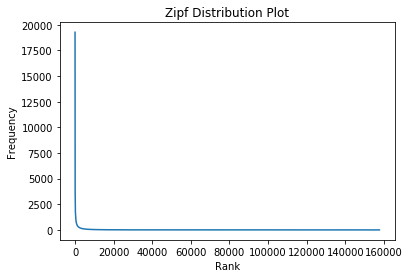

In [4]:
# Graphing Process
plt.plot(word_list_df.loc[:,'Rank'], word_list_df.loc[:,'TF_Count'])
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf Distribution Plot')
plt.show()

#word_list_df.to_csv('./ChineseDataset_TF_IDF.csv', header=True, index=False)

In [ ]:
word_list_df.head()

# Original Version

In [ ]:
'''
Chinese stop word dictionary Reference: https://github.com/tomlinNTUB/Python-in-5-days
'''
# Import Packages
import monpa
import pandas as pd
import numpy as np

# Create Chinese Stop Words Dictionary
stop_words = []
with open('./ChineseStopWord.txt', 'r', encoding='UTF-8') as file:
    for line in file.readlines():
        line = line.strip()
        stop_words.append(line)

# Tokenization with Monpa & remove 
# for i in range(len(ChineseDataset)):
for i in range(1):
    line = str(ChineseDataset.iloc[i,:])
    cut_list = Monpa_LongCut(line, '，')
    # Strip the blanks and \n
    result_list = []
    for index,item in enumerate(cut_list):
        item = item.strip()
        result_list.append(item)
    # Compute length of document
    length_of_document = len(result_list)
    # Remove Stop words
    remain_words = list(filter(lambda a: a not in stop_words and a != '\n', result_list))
    # Create Dataframe with Word Counts
    word_list_df = pd.DataFrame({'Word':[],
                                 'Count':[]
                                })
    for index,word in enumerate(remain_words):
        if word not in word_list_df.loc[:,'Word'].tolist():
            word_list_df = word_list_df.append({'Word': word,'Count': int(1)}, ignore_index=True)
        else:
            condition = word_list_df['Word'] == word
            word_list_df.loc[condition, 'Count'] = word_list_df.loc[condition, 'Count'] + 1
    word_list_df.loc[:,'TF(Term Frequency)'] = word_list_df.loc[:,'Count'] / length_of_document



    print(word_list_df.head(20))